In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import string
import seaborn as sns
import numpy as np

/opt/homebrew/anaconda3/envs/puzzle_local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Getting the versions of the imported packages
pandas_version = pd.__version__
matplotlib_version =matplotlib.__version__
seaborn_version = sns.__version__
numpy_version = np.__version__

(pandas_version, matplotlib_version, seaborn_version, numpy_version)

('1.5.2', '3.6.2', '0.11.2', '1.23.3')

# Figure2:Panel A

In [3]:
# R5before_human.csv indicates the top five groups with the lowest RMSD in the human group.
# R5after_human.csv indicates the groups that are not in the top 5 RMSD rankings, covering the remaining groups.
# solution_clash.csv represents the clash score of the solution, mainly obtained by running the MolProbity program(Chen VB, Arendall WB 3rd, Headd JJ, et al. Acta Crystallogr D Biol Crystallogr. 2010;66(Pt 1):12-21. doi:10.1107/S0907444909042073) .
RoundV_R5before_human=pd.read_csv('./scores/Figure2/R5before_human.csv')
RoundV_R5after_human=pd.read_csv('./scores/Figure2/R5after_human.csv')
df_solution_clash=pd.read_csv('./scores/Figure2/solution_clash.csv')
RoundV_R5before_human_tm=RoundV_R5before_human.copy()
#TM scores for 'PZ22','PZ22Dimer','PZ26','PZ27', and 'PZ28' are not shown because they are all double-stranded.
RoundV_R5before_human_tm.loc[RoundV_R5before_human_tm['PZ'].isin(['PZ22','PZ22Dimer','PZ26','PZ27', 'PZ28']), ['TM' ]] = 1000
RoundV_R5after_human_tm=RoundV_R5after_human.copy()
RoundV_R5after_human_tm.loc[RoundV_R5after_human_tm['PZ'].isin(['PZ22','PZ22Dimer','PZ26','PZ27', 'PZ28']), ['TM']] = 1000

CASP15_df_solution_clash_human=pd.read_csv("./scores/Figure2/CASP15human_solution_clash.csv")
RoundV_df_solution_clash_human=pd.read_csv('./scores/Figure2//RoundVhuman_solution_clash.csv')
CASP15_R5before_human=pd.read_csv('./scores/Figure2/CASP15human_beforeRMSD5.csv')
CASP15_R5after_human=pd.read_csv('./scores/Figure2/CASP15human_afterRMSD5.csv')

In [4]:
# It does not display the TM scores for 'PZ22', 'PZ22Dimer', 'PZ26', 'PZ27', 'PZ28', so other values are set instead.
RoundV_R5before_human_tm=RoundV_R5before_human.copy()
RoundV_R5before_human_tm.loc[RoundV_R5before_human_tm['PZ'].isin(['PZ22','PZ22Dimer','PZ26','PZ27', 'PZ28']), ['TM' ]] = 1000
RoundV_R5after_human_tm=RoundV_R5after_human.copy()
RoundV_R5after_human_tm.loc[RoundV_R5after_human_tm['PZ'].isin(['PZ22','PZ22Dimer','PZ26','PZ27', 'PZ28']), ['TM']] = 1000

In [5]:
# Setting the order of colours and figure legends
CASP15_group_color={'Chen': '#1f77b4',
 'Szachniuk': '#9467bd',
 'Rookie': '#cb8c80',
 'Xiong': '#FF2F7E',
 'Yang': '#dbdb8d',
 'Bujnicki': '#2ca02c',
 'DF_RNA': '#FF8011',
 'PerezLab_Gators': '#d6bcc0',
 'AIchemy_LIG': '#f7b6d2',
 'Manifold': '#9daf87',
 'Kiharalab': '#7f7f7f',
 'CoMMiT': '#17becf',
 'UltraFold': '#ff9896',
 'FoldEver': '#f7b6d2',
 'nucE2E': '#f0b98d',
 'SHT': '#c5b0d5',
 'YangServer': '#dbdb8d'}

 

CASP15_group_sort={'Kiharalab': 1.0,
 'CoMMiT': 1.0,
 'UltraFold': 1.0,
 'Chen': 1.0,
 'Manifold': 37.0,
 'Xiong': 21.0,
 'Yang': 18.0,
 'YangServer': 23.0,
 'Coqualia': 12.0,
 'SHT': 12.0,
 'GinobiFold': 14.0,
 'SoutheRNA': 15.0,
 'Szachniuk': 16.0,
 'FoldEver': 16.0,
 'Rookie': 18.0,
 'LCBio': 20.0,
 'BAKER': 21.0,
 'Bujnicki': 24.0,
 'GWxraylab': 25.0,
 'FoldEver-Hybrid': 26.0,
 'DF_RNA': 26.0,
 'UNRES': 28.0,
 'rDP': 29.0,
 'CoDock': 30.0,
 'Graphen_Medical': 31.0,
 'PerezLab_Gators': 32.0,
 'Schug_Lab': 33.0,
 'nucE2E': 34.0,
 'WL_team': 35.0,
 'Venclovas': 35.0,
 'AIchemy_LIG': 37.0,
 'Others': 1000}


RoundV_group_color={'Das': '#d62728',
 'Chen': '#1f77b4',
 'Szachniuk': '#9467bd',
 'Bujnicki': '#2ca02c',
 'Xiao': '#ff7f0e',
 'Ding': '#bcbd22',
 'Kollmann': '#8c564b',
 'Perez': '#e377c2',
 'Dokholyan': '#d6bcc0',
 'LCBio': '#e377c2',
 'Lee': '#7f7f7f',
 'SoutheRNA': '#17becf',
 'Yang': '#ff9896',
 'Anonymous': '#f7b6d2',
 'Boniecki': '#f0b98d',
 'Xiong': '#c49c94',
 'YagoubAli': '#9edae5',
 'DiMaio': '#aec7e8',
 'Others': '#e4e4e4',
 'RNAComposer': '#9467bd',
 '3dRNA': '#ff7f0e',
 'LeeAS': '#7f7f7f',
 'SimRNA': '#2ca02c',
 'RW3D': '#d62728',
 'YangServer': '#ff9896',
 'iFoldRNA': '#d6bcc0'}




RoundV_group_sort={'Das': 1,
 'Chen': 2,
 'Szachniuk': 3,
 'Bujnicki': 4,
 'Xiao': 5,
 'Ding': 6,
 'Kollmann': 7,
 'Perez': 8,
 'Dokholyan': 9,
 'LCBio': 10,
 'Lee': 11,
 'SoutheRNA': 12,
 'Yang': 13,
 'Anonymous': 14,
 'Boniecki': 15,
 'Xiong': 16,
 'YagoubAli': 17,
 'DiMaio': 18,
 'Others': 1000,
 'RNAComposer': 1,
 'SimRNA': 2,
 'RW3D': 3,
 'iFoldRNA': 4,
 '3dRNA': 5,
 'YangServer': 6,
 'LeeAS': 7}



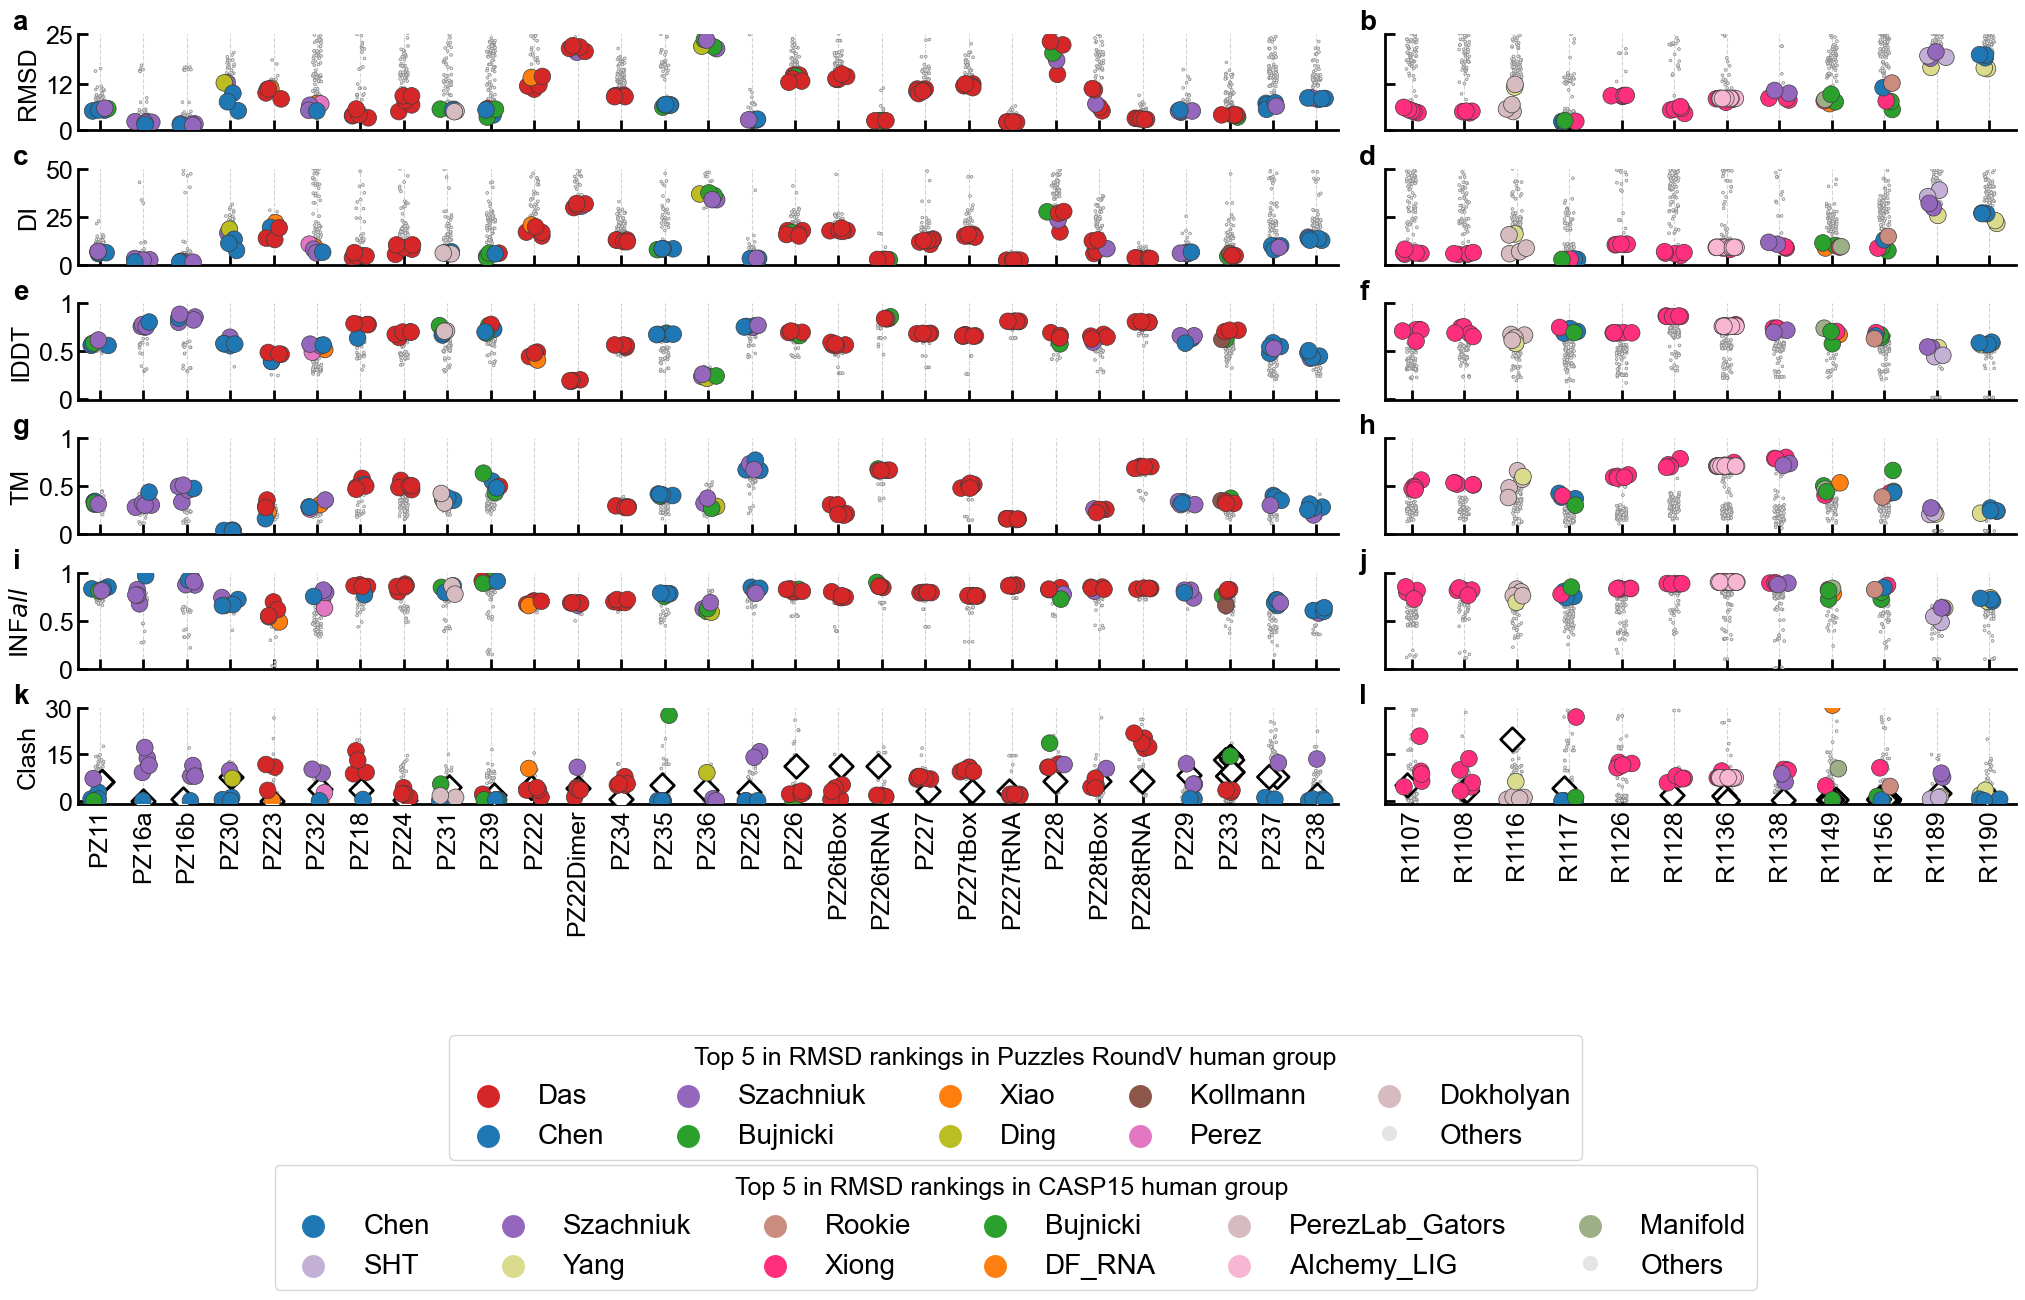

In [6]:
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import gridspec
import seaborn as sns
def sort_legend(labels1,handles1,group_sort):
    sorted_indices = sorted(range(len(labels1)), key=lambda x: group_sort[labels1[x]])
    sorted_labels = [labels1[i] for i in sorted_indices]
    sorted_handles = [handles1[i] for i in sorted_indices]
    return [sorted_handles,sorted_labels]

matplotlib.rcParams.update({'font.size': 18,'font.family': 'Arial'})
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) = plt.subplots(6, 2, figsize=(25, 10), gridspec_kw={'width_ratios': [2, 1]})

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]:
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.xaxis.label.set_visible(False)
    ax.spines['left'].set_linewidth(2)   
    ax.spines['bottom'].set_linewidth(2)  
    ax.tick_params(axis='both',         
               direction='in',       
               length=8,            
               width=2)              


for ax in [ax2, ax4, ax6, ax8, ax10, ax12]:
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.yaxis.label.set_visible(False)
    ax.spines['left'].set_linewidth(2)   
    ax.spines['bottom'].set_linewidth(2)  
    ax.tick_params(axis='both',          
               direction='in',       
               length=8,            
               width=2)             




label_s=20
sns.despine()
ax1=sns.stripplot(x='PZ',y='RMSD',data=RoundV_R5after_human,linewidth=0.5, color='#e4e4e4', ax=ax1,size=2)
ax1=sns.stripplot(x='PZ',y='RMSD',data=RoundV_R5before_human,linewidth=0.5, palette=RoundV_group_color,hue='Groups_new', ax=ax1,jitter=0.2,size=12)
ax1.set_xlabel("")
ax1.set_ylim(0,25.03)


ax1.set_ylabel("RMSD")
ax1.annotate('a', (-2,1.05), size=label_s, xycoords=ax1.get_xaxis_transform(), weight='bold')
ax1.set_yticks([0,12,25])
ax1.set_yticklabels(['0', '12', '25'])
ax1.legend_.remove()

ax3=sns.stripplot(x='PZ',y='DI',data=RoundV_R5after_human,linewidth=0.5, color='#e4e4e4', ax=ax3,size=2)
ax3=sns.stripplot(x='PZ',y='DI',data=RoundV_R5before_human,linewidth=0.5, palette=RoundV_group_color,hue='Groups_new', ax=ax3,jitter=0.2,size=12)
ax3.set_xlabel("")
ax3.set_ylabel("DI")
ax3.set_ylim(0, 50)
ax3.set_yticks([0,25,50])
ax3.set_yticklabels(['0', '25', '50'])
ax3.annotate('c', (-2,1.05), size=label_s, xycoords=ax3.get_xaxis_transform(), weight='bold')
ax3.legend_.remove()


ax5=sns.stripplot(x='PZ',y='Lddt_score',data=RoundV_R5after_human,linewidth=0.5, color='#e4e4e4', ax=ax5,size=2)
ax5=sns.stripplot(x='PZ',y='Lddt_score',data=RoundV_R5before_human,linewidth=0.5, palette=RoundV_group_color,hue='Groups_new', ax=ax5,jitter=0.2,size=12)
ax5.set_xlabel("")
ax5.set_ylabel("lDDT")
ax5.set_ylim(-0.01, 1)
ax5.set_yticks([0,0.5,1])
ax5.set_yticklabels(['0', '0.5', '1'])
ax5.annotate('e', (-2,1.05), size=label_s, xycoords=ax5.get_xaxis_transform(), weight='bold')
ax5.legend_.remove()



ax7=sns.stripplot(x='PZ',y='TM',data=RoundV_R5after_human_tm,linewidth=0.5, color='#e4e4e4', ax=ax7,size=2)
ax7=sns.stripplot(x='PZ',y='TM',data=RoundV_R5before_human_tm,linewidth=0.5, palette=RoundV_group_color,hue='Groups_new', ax=ax7,jitter=0.2,size=12)
ax7.set_xlabel("")
ax7.set_ylabel("TM")
ax7.set_ylim(0, 1)
ax7.set_yticks([0,0.5,1])
ax7.set_yticklabels(['0', '0.5', '1'])
ax7.annotate('g', (-2,1.05), size=label_s, xycoords=ax7.get_xaxis_transform(), weight='bold')
ax7.legend_.remove()

ax9=sns.stripplot(x='PZ',y='INF_all',data=RoundV_R5after_human,linewidth=0.5, color='#e4e4e4', ax=ax9,size=2)
ax9=sns.stripplot(x='PZ',y='INF_all',data=RoundV_R5before_human,linewidth=0.5, palette=RoundV_group_color,hue='Groups_new', ax=ax9,jitter=0.2,size=12)
ax9.set_xlabel("")
ax9.set_ylabel("INF$all$")
ax9.set_ylim(0, 1)
ax9.set_yticks([0,0.5,1])
ax9.set_yticklabels(['0', '0.5', '1'])
ax9.annotate('i', (-2,1.05), size=label_s, xycoords=ax9.get_xaxis_transform(), weight='bold')
#ax9.tick_params(rotation=90)
ax9.legend_.remove()

ax11=sns.stripplot(x='PZ',y='clash',data=RoundV_R5after_human,linewidth=0.5, color='#e4e4e4', ax=ax11,size=2)
ax11=sns.stripplot(x='Category', y='Value',data=RoundV_df_solution_clash_human, color='white', marker='D', edgecolor='black', linewidth=2,ax=ax11,size=12)
ax11=sns.stripplot(x='PZ',y='clash',data=RoundV_R5before_human,linewidth=0.5, palette=RoundV_group_color,hue='Groups_new', ax=ax11,jitter=0.2,size=12)
ax11.set_xlabel("")
ax11.set_ylabel("Clash")
ax11.set_ylim(-1, 30)
ax11.set_yticks([0,15,30])
ax11.annotate('k', (-2,1.05), size=label_s, xycoords=ax11.get_xaxis_transform(), weight='bold')
ax11.tick_params(rotation=90)
ax11.set_yticklabels(["0","15","30"],rotation=0)
ax11.legend_.remove()





ax2=sns.stripplot(x='casp_',y='RMSD',data=CASP15_R5after_human,linewidth=0.5, color='#e4e4e4', ax=ax2,size=2)
ax2=sns.stripplot(x='casp_',y='RMSD',data=CASP15_R5before_human,linewidth=0.5, palette=CASP15_group_color,hue='group_name', ax=ax2,jitter=0.2,size=12)
ax2.set_xlabel("")
ax2.set_ylabel("DI")
ax2.set_ylim(0, 25)
ax2.set_yticks([0,12,25])
ax2.annotate('b', (-1,1.05), size=label_s, xycoords=ax2.get_xaxis_transform(), weight='bold')
ax2.tick_params(rotation=90)
ax2.legend_.remove()

ax4=sns.stripplot(x='casp_',y='DI',data=CASP15_R5after_human,linewidth=0.5, color='#e4e4e4', ax=ax4,size=2)
ax4=sns.stripplot(x='casp_',y='DI',data=CASP15_R5before_human,linewidth=0.5, palette=CASP15_group_color,hue='group_name', ax=ax4,jitter=0.2,size=12)
ax4.set_xlabel("")
ax4.set_ylabel("DI")
ax4.set_ylim(0, 50)
ax4.set_yticks([0,25,50])
ax4.annotate('d', (-1,1.05), size=label_s, xycoords=ax4.get_xaxis_transform(), weight='bold')
ax4.tick_params(rotation=90)
ax4.legend_.remove()

ax6=sns.stripplot(x='casp_',y='lddt',data=CASP15_R5after_human,linewidth=0.5, color='#e4e4e4', ax=ax6,size=2)
ax6=sns.stripplot(x='casp_',y='lddt',data=CASP15_R5before_human,linewidth=0.5, palette=CASP15_group_color,hue='group_name', ax=ax6,jitter=0.2,size=12)
ax6.set_xlabel("")
ax6.set_ylabel("lDDT")
ax6.set_ylim(-0.01, 1)
ax6.set_yticks([0,0.5,1])
ax6.annotate('f', (-1,1.05), size=label_s, xycoords=ax6.get_xaxis_transform(), weight='bold')
ax6.tick_params(rotation=90)
ax6.legend_.remove()

ax8=sns.stripplot(x='casp_',y='TM',data=CASP15_R5after_human,linewidth=0.5, color='#e4e4e4', ax=ax8,size=2)
ax8=sns.stripplot(x='casp_',y='TM',data=CASP15_R5before_human,linewidth=0.5, palette=CASP15_group_color,hue='group_name', ax=ax8,jitter=0.2,size=12)
ax8.set_xlabel("")
ax8.set_ylabel("TM")
ax8.set_ylim(0, 1)
ax8.set_yticks([0,0.5,1])
ax8.annotate('h', (-1,1.05), size=label_s, xycoords=ax8.get_xaxis_transform(), weight='bold')
ax8.tick_params(rotation=90)
ax8.legend_.remove()

ax10=sns.stripplot(x='casp_',y='INF_all',data=CASP15_R5after_human,linewidth=0.5, color='#e4e4e4', ax=ax10,size=2)
ax10=sns.stripplot(x='casp_',y='INF_all',data=CASP15_R5before_human,linewidth=0.5, palette=CASP15_group_color,hue='group_name', ax=ax10,jitter=0.2,size=12)
ax10.set_xlabel("")
ax10.set_ylabel("INF$all$")
ax10.set_ylim(0, 1)
ax10.set_yticks([0,0.5,1])
ax10.annotate('j', (-1,1.05), size=label_s, xycoords=ax10.get_xaxis_transform(), weight='bold')
ax10.tick_params(rotation=90)
ax10.legend_.remove()

ax12=sns.stripplot(x='casp_',y='clash',data=CASP15_R5after_human,linewidth=0.5, color='#e4e4e4', ax=ax12,size=2)
ax12=sns.stripplot(x='Category_', y='Value',data=CASP15_df_solution_clash_human, color='white', marker='D', edgecolor='black', linewidth=2,ax=ax12,size=12)
ax12=sns.stripplot(x='casp_',y='clash',data=CASP15_R5before_human,linewidth=0.5, palette=CASP15_group_color,hue='group_name', ax=ax12,jitter=0.2,size=12)
ax12.set_xlabel("")
ax12.set_ylabel("Clash")
ax12.set_ylim(-1, 30)
ax12.set_yticks([0,15,30])
ax12.annotate('l', (-1,1.05), size=label_s, xycoords=ax12.get_xaxis_transform(), weight='bold')
ax12.tick_params(rotation=90)
ax12.legend_.remove()





ax1.xaxis.grid(True, linestyle='--', color='lightgray')
ax2.xaxis.grid(True, linestyle='--', color='lightgray')
ax3.xaxis.grid(True, linestyle='--', color='lightgray')
ax4.xaxis.grid(True, linestyle='--', color='lightgray')
ax5.xaxis.grid(True, linestyle='--', color='lightgray')
ax6.xaxis.grid(True, linestyle='--', color='lightgray')
ax7.xaxis.grid(True, linestyle='--', color='lightgray')
ax8.xaxis.grid(True, linestyle='--', color='lightgray')
ax9.xaxis.grid(True, linestyle='--', color='lightgray')
ax10.xaxis.grid(True, linestyle='--', color='lightgray')
ax11.xaxis.grid(True, linestyle='--', color='lightgray')
ax12.xaxis.grid(True, linestyle='--', color='lightgray')

handles1, labels1 = [], []
handles2, labels2 = [], []

    
    
for ax in [ ax1,ax3,ax5,ax7,ax9,ax11]:
    h, l = ax.get_legend_handles_labels()
    handles1.extend(h)
    labels1.extend(l)
    ax.spines['left'].set_linewidth(2)   
    ax.spines['bottom'].set_linewidth(2) 
    ax.tick_params(axis='both',          
               direction='in',       
               length=7,            
               width=2
               )             
    

    
    
for ax in [ax2,ax4,ax6,ax8,ax10,ax12]:
    h, l = ax.get_legend_handles_labels()
    handles2.extend(h)
    labels2.extend(l)
    ax.spines['left'].set_linewidth(2)   
    ax.spines['bottom'].set_linewidth(2)  
    ax.tick_params(axis='both',          
               direction='in',       
               length=7,            
               width=2)              

handles1.append(plt.Line2D([], [], marker='o', markersize=5, label='Others', color='#e4e4e4', linestyle='None'))
labels1.append('Others')



handles2.append(plt.Line2D([], [], marker='o', markersize=5, label='Others', color='#e4e4e4', linestyle='None'))
labels2.append('Others')  
    

legend_dict1 = dict(zip(labels1, handles1))  
labels_unique1 = list(legend_dict1.keys())
handles_unique1 = [legend_dict1[label] for label in labels_unique1]



legend_dict2 = dict(zip(labels2, handles2))  
labels_unique2 = list(legend_dict2.keys())
handles_unique2 = [legend_dict2[label] for label in labels_unique2]



fig.legend(sort_legend(labels_unique1,handles_unique1,RoundV_group_sort)[0],sort_legend(labels_unique1,handles_unique1,RoundV_group_sort)[1], title="Top 5 in RMSD rankings in Puzzles RoundV human group", loc='lower center', bbox_to_anchor=(0.5, -0.26), ncol=5, prop={'size': 20},markerscale=2)
fig.legend(sort_legend(labels_unique2,handles_unique2,CASP15_group_sort)[0],sort_legend(labels_unique2,handles_unique2,CASP15_group_sort)[1], title="Top 5 in RMSD rankings in CASP15 human group ", loc='lower center', bbox_to_anchor=(0.5, -0.39), ncol=6, prop={'size': 20},markerscale=2)


plt.subplots_adjust(hspace=0.4, wspace=0.05)

plt.savefig("./figures/Figure2/Figure2_pannelA.pdf",bbox_inches='tight',format="pdf")
plt.show()


# Figur2:Panel B

In [7]:
df_ares_rnapuzzle_lddt = pd.read_csv("./scores/Figure2/puzzles_ares_lddt_sum.csv")

In [8]:
all_list=pd.read_excel('./scores/human_webserver_stastic.xlsx',sheet_name='new_data')
human_model_list=all_list[all_list['Methods']=='Human']['group'].to_list()

server_model_list=all_list[all_list['Methods']=='Server']['group'].to_list()

In [9]:
mask_human = df_ares_rnapuzzle_lddt['Groups'].isin(human_model_list)
df_human = df_ares_rnapuzzle_lddt[mask_human].reset_index(drop=True)
df_human

Groups  model    RMSD  RMSD_rank      DI  DI_rank  INF_all  \
0          Chen      5   4.989          1   5.852        1    0.853   
1          Chen      2   5.193          2   6.226        2    0.834   
2          Chen      4   5.255          3   6.333        3    0.830   
3      Bujnicki      3   5.582          4   6.875        4    0.812   
4       Adamiak      7   5.724          5   7.026        5    0.815   
...         ...    ...     ...        ...     ...      ...      ...   
1538      Dfold      5  23.037        101  40.270       98    0.572   
1539  DasEMinfo      5  23.038        102  27.373       85    0.842   
1540  Dokholyan      4  23.211        103  42.650       99    0.544   
1541       Ding      5  23.301        104  28.395       90    0.821   
1542       Xiao      1  23.926        105  30.468       92    0.785   

      INF_all_rank  INF_wc  INF_wc_rank  ...   p-value  solution    PZ  \
0                3   0.953           18  ...  0.000000         0  PZ11   
1                4   0.977            9  ...  0.000000         1  PZ11   
2                6   0.977            9  ...  0.000000         0  PZ11   
3               14   0.978            4  ...  0.000000         1  PZ11   
4               12   1.000            1  ...  0.000000         1  PZ11   
...            ...     ...          ...  ...       ...       ...   ...   
1538            95   0.336           96  ...  0.005524         0  PZ39   
1539            50   0.959           37  ...  0.005533         0  PZ39   
1540            97   0.257           99  ...  0.007244         0  PZ39   
1541            71   0.930           58  ...  0.008317         0  PZ39   
1542            83   0.855           85  ...  0.020310         0  PZ39   

      RMSD_minus     complete_name           ares_id  ares_score  \
0         -4.989       PZ11_Chen_5       PZ11_Chen_5    7.488022   
1         -5.193       PZ11_Chen_2       PZ11_Chen_2    7.322084   
2         -5.255       PZ11_Chen_4       PZ11_Chen_4    7.338090   
3         -5.582   PZ11_Bujnicki_3   PZ11_Bujnicki_3    6.687332   
4         -5.724    PZ11_Adamiak_7    PZ11_Adamiak_7    6.943213   
...          ...               ...               ...         ...   
1538     -23.037      PZ39_Dfold_5      PZ39_Dfold_5    9.159027   
1539     -23.038  PZ39_DasEMinfo_5  PZ39_DasEMinfo_5    6.444490   
1540     -23.211  PZ39_Dokholyan_4  PZ39_Dokholyan_4    8.769600   
1541     -23.301       PZ39_Ding_5       PZ39_Ding_5    7.200872   
1542     -23.926       PZ39_Xiao_1       PZ39_Xiao_1    6.922027   

        complete_model  Lddt_score  Lddt_rank  
0          PZ11_Chen_5    0.559357         16  
1          PZ11_Chen_2    0.574762         14  
2          PZ11_Chen_4    0.558393         17  
3      PZ11_Bujnicki_3    0.585015         11  
4       PZ11_Adamiak_7    0.615203          2  
...                ...         ...        ...  
1538      PZ39_Dfold_5    0.349603        105  
1539  PZ39_DasEMinfo_5    0.651121         46  
1540  PZ39_Dokholyan_4    0.383151        103  
1541       PZ39_Ding_5    0.572377         89  
1542       PZ39_Xiao_1    0.546666         96  

[1543 rows x 32 columns]

In [10]:
mask_server = df_ares_rnapuzzle_lddt['Groups'].isin(server_model_list)
df_server = df_ares_rnapuzzle_lddt[mask_server].reset_index(drop=True)
df_server

Groups  model    RMSD  RMSD_rank      DI  DI_rank  INF_all  \
0    RNAComposerAS1      3   1.235          1   1.360        1    0.908   
1           RW3DAS2      6   1.523          3   1.738        3    0.877   
2           RW3DAS2      7   1.661          4   1.975        5    0.841   
3           RW3DAS2      8   1.688          5   1.963        4    0.860   
4    RNAComposerAS2      8   1.881          6   2.442        9    0.770   
..              ...    ...     ...        ...     ...      ...      ...   
414          SimRNA      1  20.392         77  24.198       70    0.843   
415     RNAComposer      1  20.546         80  23.219       62    0.885   
416      YangServer      4  20.636         83  32.129       95    0.642   
417          SimRNA      4  22.273         95  26.464       82    0.842   
418      YangServer      2  22.309         97  27.028       84    0.825   

     INF_all_rank  INF_wc  INF_wc_rank  ...       p-value  solution     PZ  \
0               2   1.000            1  ...  1.039000e-09         0  PZ16a   
1               4   0.913           12  ...  2.753000e-09         0  PZ16a   
2              11   0.913           12  ...  4.338000e-09         0  PZ16a   
3               7   0.913           12  ...  4.744000e-09         0  PZ16a   
4              33   0.913           12  ...  8.874000e-09         0  PZ16a   
..            ...     ...          ...  ...           ...       ...    ...   
414            45   0.901           73  ...  3.030000e-05         0   PZ39   
415            28   0.959           37  ...  4.330000e-05         0   PZ39   
416            92   0.569           92  ...  5.320000e-05         0   PZ39   
417            50   0.959           37  ...  1.509000e-03         0   PZ39   
418            64   0.870           80  ...  1.609000e-03         0   PZ39   

     RMSD_minus           complete_name                 ares_id  ares_score  \
0        -1.235  PZ16a_RNAComposerAS1_3  PZ16a_RNAComposerAS1_3    7.828875   
1        -1.523         PZ16a_RW3DAS2_6         PZ16a_RW3DAS2_6    7.188815   
2        -1.661         PZ16a_RW3DAS2_7         PZ16a_RW3DAS2_7    7.342369   
3        -1.688         PZ16a_RW3DAS2_8         PZ16a_RW3DAS2_8    7.418786   
4        -1.881  PZ16a_RNAComposerAS2_8  PZ16a_RNAComposerAS2_8    8.220875   
..          ...                     ...                     ...         ...   
414     -20.392           PZ39_SimRNA_1           PZ39_SimRNA_1    6.468343   
415     -20.546      PZ39_RNAComposer_1      PZ39_RNAComposer_1    6.356048   
416     -20.636       PZ39_YangServer_4       PZ39_YangServer_4    9.193802   
417     -22.273           PZ39_SimRNA_4           PZ39_SimRNA_4    6.316412   
418     -22.309       PZ39_YangServer_2       PZ39_YangServer_2    7.510828   

             complete_model  Lddt_score  Lddt_rank  
0    PZ16a_RNAComposerAS1_3    0.878510          1  
1           PZ16a_RW3DAS2_6    0.837835          2  
2           PZ16a_RW3DAS2_7    0.816118          6  
3           PZ16a_RW3DAS2_8    0.830552          3  
4    PZ16a_RNAComposerAS2_8    0.757486         29  
..                      ...         ...        ...  
414           PZ39_SimRNA_1    0.666271         37  
415      PZ39_RNAComposer_1    0.681523         30  
416       PZ39_YangServer_4    0.588256         80  
417           PZ39_SimRNA_4    0.657879         41  
418       PZ39_YangServer_2    0.607340         68  

[419 rows x 32 columns]

In [11]:
df_human_TM= df_human[~df_human['PZ'].isin(['PZ22','PZ22Dimer','PZ26','PZ27', 'PZ28'])]
print(df_human_TM['PZ'].isin(['PZ22','PZ22Dimer','PZ26', 'PZ7', 'PZ8']).any())

False


In [12]:
# It is divided into 5 groups, which are RNA element,Aptamer,Viral，Ribozyme，Riboswitch.
df_human_RNA_ele= df_human[(df_human['PZ'] == 'PZ11') | (df_human['PZ'] == 'PZ16a')| (df_human['PZ'] == 'PZ16b')| (df_human['PZ'] == 'PZ30')]
df_huamn_apt_ele=df_human[(df_human['PZ'] == 'PZ23') | (df_human['PZ'] == 'PZ32')]
df_human_viral_ele=df_human[(df_human['PZ'] == 'PZ18') | (df_human['PZ'] == 'PZ24')| (df_human['PZ'] == 'PZ31')| (df_human['PZ'] == 'PZ39')]
df_human_ribozyme=df_human[(df_human['PZ'] == 'PZ22') | (df_human['PZ'] == 'PZ22Dimer')| (df_human['PZ'] == 'PZ34')| (df_human['PZ'] == 'PZ35')|(df_human['PZ'] == 'PZ36')]
df_human_ribozyme_tmscore=df_human[(df_human['PZ'] == 'PZ34')| (df_human['PZ'] == 'PZ35')|(df_human['PZ'] == 'PZ36')]
df_human_riboswitch=df_human[(df_human['PZ'] == 'PZ25') | (df_human['PZ'] == 'PZ26')| (df_human['PZ'] == 'PZ26tBox')| (df_human['PZ'] == 'PZ26tRNA')| 
                              (df_human['PZ'] == 'PZ27')| (df_human['PZ'] == 'PZ27tBox')| (df_human['PZ'] == 'PZ27tRNA')| (df_human['PZ'] == 'PZ28')| (df_human['PZ'] == 'PZ28tBox')| (df_human['PZ'] == 'PZ28tRNA')
                             | (df_human['PZ'] == 'PZ29')| (df_human['PZ'] == 'PZ33')| (df_human['PZ'] == 'PZ37')| (df_human['PZ'] == 'PZ38')]
df_human_riboswitch_tmscore=df_human[(df_human['PZ'] == 'PZ25') | (df_human['PZ'] == 'PZ26tBox')| (df_human['PZ'] == 'PZ26tRNA')| (df_human['PZ'] == 'PZ27tBox')| (df_human['PZ'] == 'PZ27tRNA')| (df_human['PZ'] == 'PZ28tBox')| (df_human['PZ'] == 'PZ28tRNA')
                             | (df_human['PZ'] == 'PZ29')| (df_human['PZ'] == 'PZ33')| (df_human['PZ'] == 'PZ37')| (df_human['PZ'] == 'PZ38')]

In [13]:
df_server_RNA_ele= df_server[(df_server['PZ'] == 'PZ11') | (df_server['PZ'] == 'PZ16a')| (df_server['PZ'] == 'PZ16b')| (df_server['PZ'] == 'PZ30')]
df_server_apt_ele=df_server[(df_server['PZ'] == 'PZ23') | (df_server['PZ'] == 'PZ32')]
df_server_viral_ele=df_server[(df_server['PZ'] == 'PZ18') | (df_server['PZ'] == 'PZ24')| (df_server['PZ'] == 'PZ31')| (df_server['PZ'] == 'PZ39')]
df_server_ribozyme=df_server[(df_server['PZ'] == 'PZ22') | (df_server['PZ'] == 'PZ22Dimer')| (df_server['PZ'] == 'PZ34')| (df_server['PZ'] == 'PZ35')|(df_server['PZ'] == 'PZ36')]
df_server_ribozyme_tmscore=df_server[(df_server['PZ'] == 'PZ34')| (df_server['PZ'] == 'PZ35')|(df_server['PZ'] == 'PZ36')]
df_server_riboswitch=df_server[(df_server['PZ'] == 'PZ25') | (df_server['PZ'] == 'PZ26')| (df_server['PZ'] == 'PZ26tBox')| (df_server['PZ'] == 'PZ26tRNA')| 
                              (df_server['PZ'] == 'PZ27')| (df_server['PZ'] == 'PZ27tBox')| (df_server['PZ'] == 'PZ27tRNA')| (df_server['PZ'] == 'PZ28')| (df_server['PZ'] == 'PZ28tBox')| (df_server['PZ'] == 'PZ28tRNA')
                             | (df_server['PZ'] == 'PZ29')| (df_server['PZ'] == 'PZ33')| (df_server['PZ'] == 'PZ37')| (df_server['PZ'] == 'PZ38')]
df_server_riboswitch_tmscore=df_server[(df_server['PZ'] == 'PZ25') | (df_server['PZ'] == 'PZ26tBox')| (df_server['PZ'] == 'PZ26tRNA')| (df_server['PZ'] == 'PZ27tBox')| (df_server['PZ'] == 'PZ27tRNA')| (df_server['PZ'] == 'PZ28tBox')| (df_server['PZ'] == 'PZ28tRNA')
                             | (df_server['PZ'] == 'PZ29')| (df_server['PZ'] == 'PZ33')| (df_server['PZ'] == 'PZ37')| (df_server['PZ'] == 'PZ38')]

In [14]:
puzzle_color_redom={'PZ11': '#1f77b4',
 'PZ16a': '#d62728',
 'PZ16b': '#9467bd',
 'PZ30': '#bcbd22',
 'PZ23': '#ef9708',
 'PZ32': '#8dd593',
 'PZ18': '#023fa5',
 'PZ24': '#e6afb9',
 'PZ31': '#11c638',
 'PZ39': '#7d87b9',
 'PZ22': '#f0b98d',
 'PZ22Dimer': '#e07b91',
 'PZ34': '#f6c4e1',
 'PZ35': '#336600',
 'PZ36': '#8595e1',
 'PZ25': '#c7c7c7',
 'PZ26': '#d33f6a',
 'PZ26tBox': '#7f7f7f',
 'PZ26tRNA': '#f3e1eb',
 'PZ27': '#4a6fe3',
 'PZ27tBox': '#9cded6',
 'PZ27tRNA': '#babb1e',
 'PZ28': '#0a1016',
 'PZ28tBox': '#ff7f0e',
 'PZ28tRNA': '#2ca02c',
 'PZ29': '#8c564b',
 'PZ33': '#e377c2',
 'PZ37': '#7f7f7f',
 'PZ38': '#b5bbe3'}

scc:RMSD_minus-ares_score,-0.030398836673276274
 P=0.37
scc:TM-ares_score,-0.23090301223893553
 P=0.00
scc:Lddt_score-ares_score,-0.407213339778391
 P=0.00
scc:INF_all-ares_score,-0.3996784221572234
 P=0.00
scc:RMSD_minus-TM,0.3267438830449091
 P=0.00
scc:RMSD_minus-Lddt_score,0.6603037388269899
 P=0.00
scc:TM-Lddt_score,0.5429412574704565
 P=0.00
scc:RMSD_minus-INF_all,0.5088933269245186
 P=0.00
scc:TM-INF_all,0.4669329135112524
 P=0.00
scc:Lddt_score-INF_all,0.8353132193148254
 P=0.00


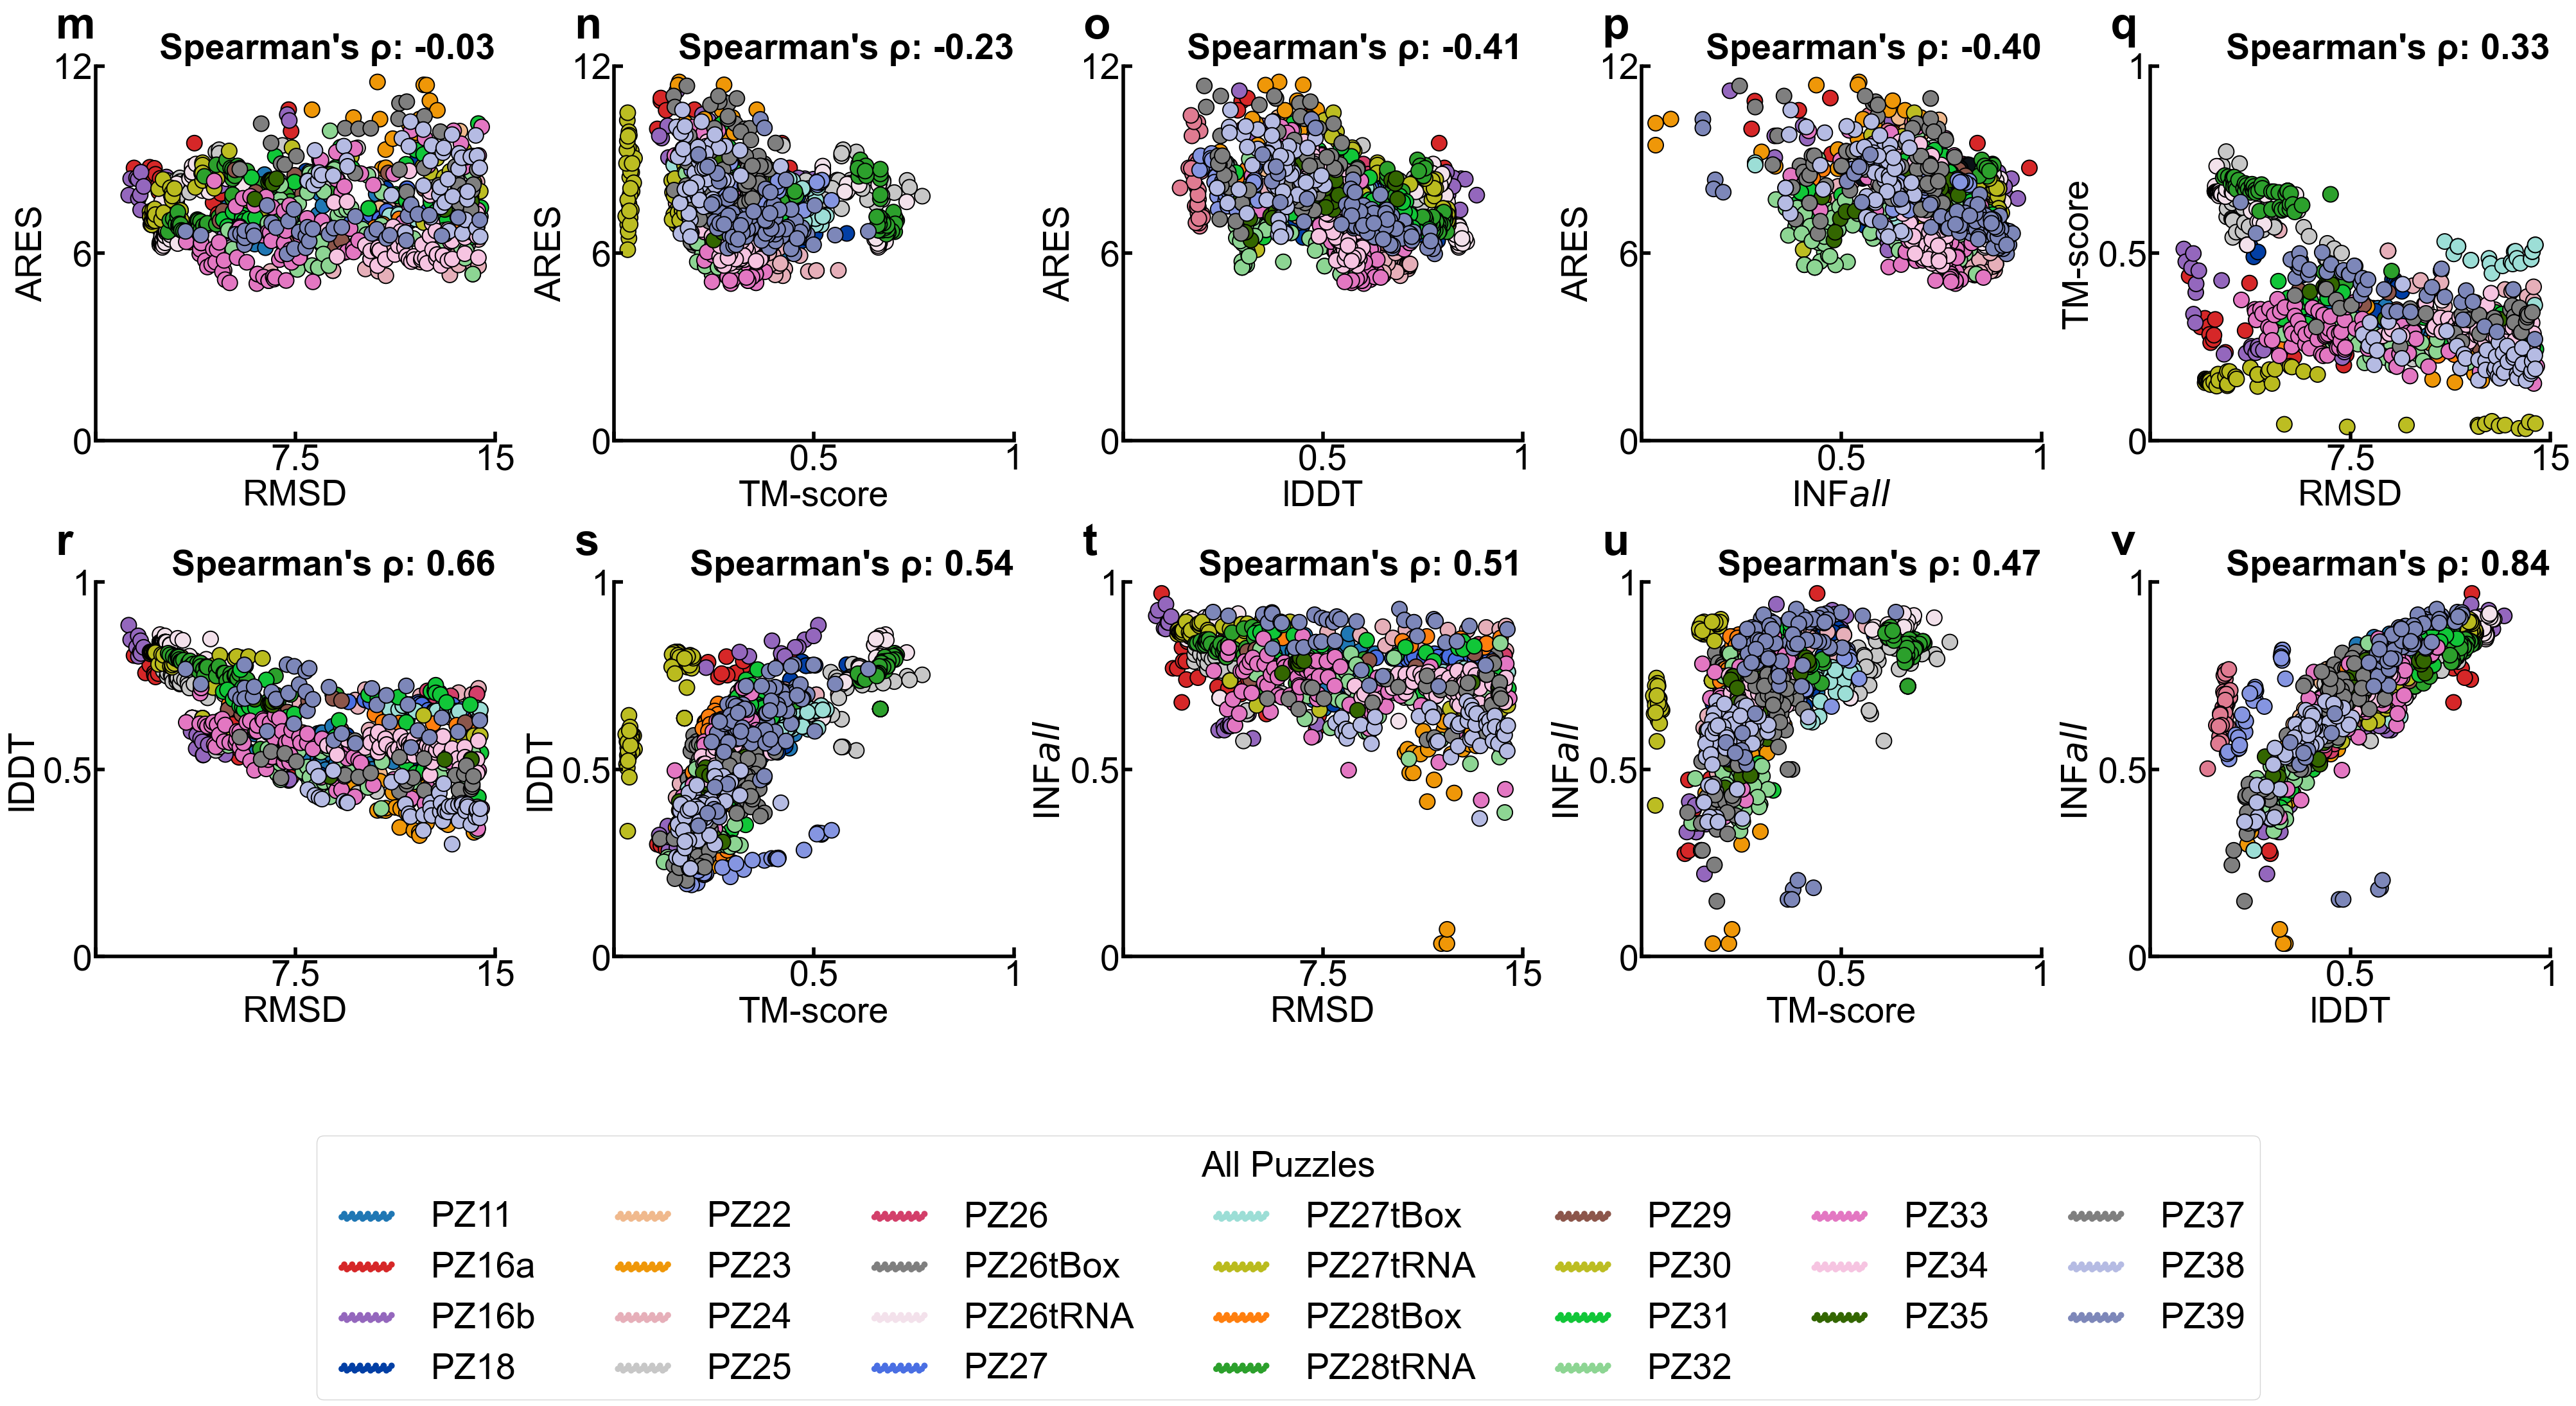

In [15]:

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import string
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr
from scipy.stats import pearsonr
def generate_alphabet_list(nums):
    total_letters = sum(nums)
    alphabet = list(string.ascii_lowercase + string.ascii_letters + string.digits + string.punctuation)
    
    result = []
    index = 0
    
    for _ in range(total_letters):
        letter = alphabet[index]
        result.append(letter)
        
        index = (index + 1) % len(alphabet)  

    return result

def generate_specialalphabet_list(nums, start_char='a'):
    alphabet = string.ascii_lowercase + string.ascii_uppercase + string.digits + string.punctuation
    start_index = alphabet.index(start_char)
    end_index = start_index + nums
    return list(alphabet[start_index:end_index])


def scatter_drawingV2(lay_list, info_dic):
    params={
    'font.family':'Arial',
    'font.size':40}
    plt.rcParams.update(params)
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    fig = plt.figure(constrained_layout=True, figsize=info_dic['figure_size'])
    gs = gridspec.GridSpec(lay_list[0], lay_list[1], figure=fig)
    num=lay_list[0]* lay_list[1]
    #label_li = generate_alphabet_list([num])
    label_li = generate_specialalphabet_list(num,'m')
    
    #print(label_li)
    num = 0
    axes_dict = {}
    handles_all_li = []
    labels_all_li = []

    for i in range(lay_list[0]):
        for j in range(lay_list[1]):
            num += 1
            ax = fig.add_subplot(gs[i, j])
            axes_dict[f"ax{num}"] = ax

    sns.despine()  # removing the top and right border lines   

    for i, ax_key in enumerate(axes_dict.keys()):
        ax = axes_dict[ax_key]
       
        ax = sns.scatterplot(x=info_dic[ax_key][0], y=info_dic[ax_key][1], data=info_dic[ax_key][3],
                           hue=info_dic[ax_key][7], ax=ax,s=300,palette=info_dic['color'][0],edgecolor='black')
        ax.set_xlabel(info_dic[ax_key][2])
        ax.set_xlim(info_dic[ax_key][4])
        ax.set_ylim(info_dic[ax_key][5])
        ax.spines['left'].set_linewidth(4)   
        ax.spines['bottom'].set_linewidth(4)  
        ax.tick_params(axis='both',          
               direction='in',       
               length=10,            
               width=4)              
        ax.set_xticks(np.linspace(info_dic[ax_key][4][0], info_dic[ax_key][4][1], 3))
        ax.set_yticks(np.linspace(info_dic[ax_key][5][0], info_dic[ax_key][5][1], 3))
        ax.set_ylabel(info_dic[ax_key][6])
        #ax.set_title()
        pcc_value, _ = pearsonr(info_dic[ax_key][3][info_dic[ax_key][9]], info_dic[ax_key][3][info_dic[ax_key][1]])
        corr, p_value = spearmanr(info_dic[ax_key][3][info_dic[ax_key][9]], info_dic[ax_key][3][info_dic[ax_key][1]])
        print(f"scc:{info_dic[ax_key][9]}-{info_dic[ax_key][1]},{corr}\n P={p_value:.2f}")
        #ax.text(-0.1, 1.05, label_li[i], size=50, transform=ax.transAxes, weight='bold')
        ax.text(-0.1, 1.05,f"{label_li[i]}", size=50, transform=ax.transAxes, weight='bold', verticalalignment='bottom', 
        horizontalalignment='left')
        ax.set_title(f"Spearman's ρ: {corr:.2f}", loc='right', fontweight='bold',fontsize=40)
        #ax.text(0.95, 0.05, f"Spearman's \n\u03C1:{corr:.2f}", horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes,weight='bold')
        ax.tick_params(rotation=0)
        handles, labels = ax.get_legend_handles_labels()
        if ax_key =='ax1':
            handles_all_li.extend(handles)
            labels_all_li.extend(labels)
        ax.legend_.remove()
        
        #Modify the x-axis scale labels to omit 0 from the origin
        x_ticks = ax.get_xticks()
        x_tick_labels = [
            "15" if tick == 15.0 else  # If the scale value is 15.0, the label is "15".
            "1" if tick == 1.0 else    # If the scale value is 1.0, the label is "1".
            "" if tick == 0.0 else     # If the scale value is 0.0, the label is an empty string
            tick              # General format for displaying scale values in other cases
            for tick in x_ticks
        ]
        ax.set_xticklabels(x_tick_labels)
        y_ticks = ax.get_yticks()
        #print(y_ticks)
        y_tick_labels = [
            "1" if tick == 1.0 else    # If the scale value is 1.0, the label is "1".
            "0" if tick == 0.0 else     # If the scale value is 0.0, the label is an empty string
            "6" if tick == 6.0 else     # If the scale value is 0.0, the label is an empty string
            "12" if tick == 12.0 else     # If the scale value is 0.0, the label is an empty string
            tick            # General format for displaying scale values in other cases
            for tick in y_ticks
        ]
        
        # y_tick_labels = ["0" if tick == 0.0 else tick for tick in y_ticks]
        # # y_tick_labels = ["1" if tick == 1.0 else tick for tick in y_ticks]
        ax.set_yticklabels(y_tick_labels)
        
    #plt.suptitle("All puzzles are not grouped", x=0.5)
    
    fig.legend(handles=handles_all_li, labels=labels_all_li, title="All Puzzles",loc='center', bbox_to_anchor=(0.5, -0.23),ncol=7,scatterpoints=20)
    plt.savefig(info_dic['pdf_name'][0],bbox_inches='tight',format='pdf') 
    plt.show()

lay_list = [2, 5]
info_dic = {
 "ax1": ['RMSD', 'ares_score', 'RMSD', df_human[(df_human['RMSD'] <=14.5) & (df_human['ares_score'] <=11.5)], [0,15],[0,12],'ARES','PZ','Yes','RMSD_minus'],
 "ax2": ['TM', 'ares_score', 'TM-score', df_human_TM[df_human_TM['ares_score']<=11.5], [0, 1],[0,12], 'ARES','PZ','No','TM'],
 "ax3": ['Lddt_score', 'ares_score', 'lDDT', df_human[df_human['ares_score']<=11.5], [0, 1],[0,12], 'ARES','PZ','No','Lddt_score'],
 "ax4": ['INF_all', 'ares_score', 'INF$all$', df_human[df_human['ares_score']<=11.5], [0, 1],[0,12], 'ARES','PZ','No','INF_all'],
 "ax5": ['RMSD', 'TM', 'RMSD', df_human_TM[df_human_TM['RMSD']<=14.5], [0,15],[0,1], 'TM-score','PZ','No','RMSD_minus'],
 "ax6": ['RMSD', 'Lddt_score', 'RMSD', df_human[df_human['RMSD'] <=14.5], [0,15],[0,1], 'lDDT','PZ','No','RMSD_minus'],
 "ax8": ['RMSD', 'INF_all', 'RMSD', df_human[df_human['RMSD'] <=14.5], [0,15],[0,1], 'INF$all$','PZ','No','RMSD_minus'],
 "ax7": ['TM', 'Lddt_score', 'TM-score', df_human_TM, [0, 1],[0,1], 'lDDT','PZ','No','TM'],
 "ax9": ['TM', 'INF_all', 'TM-score', df_human_TM, [0, 1],[0,1], 'INF$all$','PZ','No','TM'],
 "ax10": ['Lddt_score', 'INF_all', 'lDDT', df_human, [0, 1],[0,1], 'INF$all$','PZ','No','Lddt_score'],
'color': [puzzle_color_redom],
'figure_size':(40,16),
    
'pdf_name':["./figures/Figure2/Figure2_pannelB.pdf"]  
}

scatter_drawingV2(lay_list, info_dic)

# Figure3: Panel A

In [16]:

df_human_sorted=pd.read_csv('./scores/Figure3/df_human_sorted.csv')
##### human
df_human_sorted['length_shift']=df_human_sorted['length']+ np.random.uniform(-1.5, 1.5, len(df_human_sorted))
df_RNA_elements = df_human_sorted[(df_human_sorted['PZ'] == 'PZ11') | (df_human_sorted['PZ'] == 'PZ16a')| (df_human_sorted['PZ'] == 'PZ16b')| (df_human_sorted['PZ'] == 'PZ30')]
df_aptamers = df_human_sorted[(df_human_sorted['PZ'] == 'PZ23') | (df_human_sorted['PZ'] == 'PZ32')]
df_viral_elements = df_human_sorted[(df_human_sorted['PZ'] == 'PZ18') | (df_human_sorted['PZ'] == 'PZ24')| (df_human_sorted['PZ'] == 'PZ31')| (df_human_sorted['PZ'] == 'PZ39')]
df_ribozymes = df_human_sorted[(df_human_sorted['PZ'] == 'PZ34') | (df_human_sorted['PZ'] == 'PZ35')| (df_human_sorted['PZ'] == 'PZ36')| (df_human_sorted['PZ'] == 'PZ22')| (df_human_sorted['PZ'] == 'PZ22Dimer')]
df_riboswitches = df_human_sorted[(df_human_sorted['PZ'] == 'PZ25') | (df_human_sorted['PZ'] == 'PZ29')| (df_human_sorted['PZ'] == 'PZ33')| (df_human_sorted['PZ'] == 'PZ37')| (df_human_sorted['PZ'] == 'PZ38')| (df_human_sorted['PZ'] == 'PZ26')| (df_human_sorted['PZ'] == 'PZ26tBox')| (df_human_sorted['PZ'] == 'PZ26tRNA')
                    | (df_human_sorted['PZ'] == 'PZ27')| (df_human_sorted['PZ'] == 'PZ27tBox')| (df_human_sorted['PZ'] == 'PZ27tRNA')| (df_human_sorted['PZ'] == 'PZ28')| (df_human_sorted['PZ'] == 'PZ28tBox')| (df_human_sorted['PZ'] == 'PZ28tRNA')]

def sort_legend(labels1,handles1):
    sorted_indices = sorted(range(len(labels1)), key=lambda x: group_sort[labels1[x]])
    sorted_labels = [labels1[i] for i in sorted_indices]
    sorted_handles = [handles1[i] for i in sorted_indices]
    return [sorted_handles,sorted_labels]

In [17]:
color_map={'Das': '#d62728',
 'Bujnicki': '#1f77b4',
 'Chen': '#9467bd',
 'Adamiak': '#2ca02c',
 'Xiao': '#ff7f0e',
 'Dokholyan': '#bcbd22',
 'Ding': '#8c564b',
 'Szachniuk': '#98df8a',
 'Perez': '#ffbb78',
 'Lee': '#e377c2',
 'LCBio': '#7f7f7f',
 'Yang': '#17becf',
 'SoutheRNA': '#ff9896',
 'Kollmann': '#f7b6d2',
 'Zhou': '#f0b98d',
 'Boniecki': '#c49c94',
 'Xiong': '#9edae5',
 'YagoubAli': '#aec7e8',
 'DiMaio': '#c5b0d5',
 'Anonymous': '#dbdb8d',
 'Szach/Adam': '#2ca02c',
 'RNAComposer': '#2ca02c',
 '3dRNA': '#ff7f0e',
 'LeeAS': '#e377c2',
 'SimRNA': '#1f77b4',
 'RW3D': '#d62728'}
group_sort=RoundV_group_sort

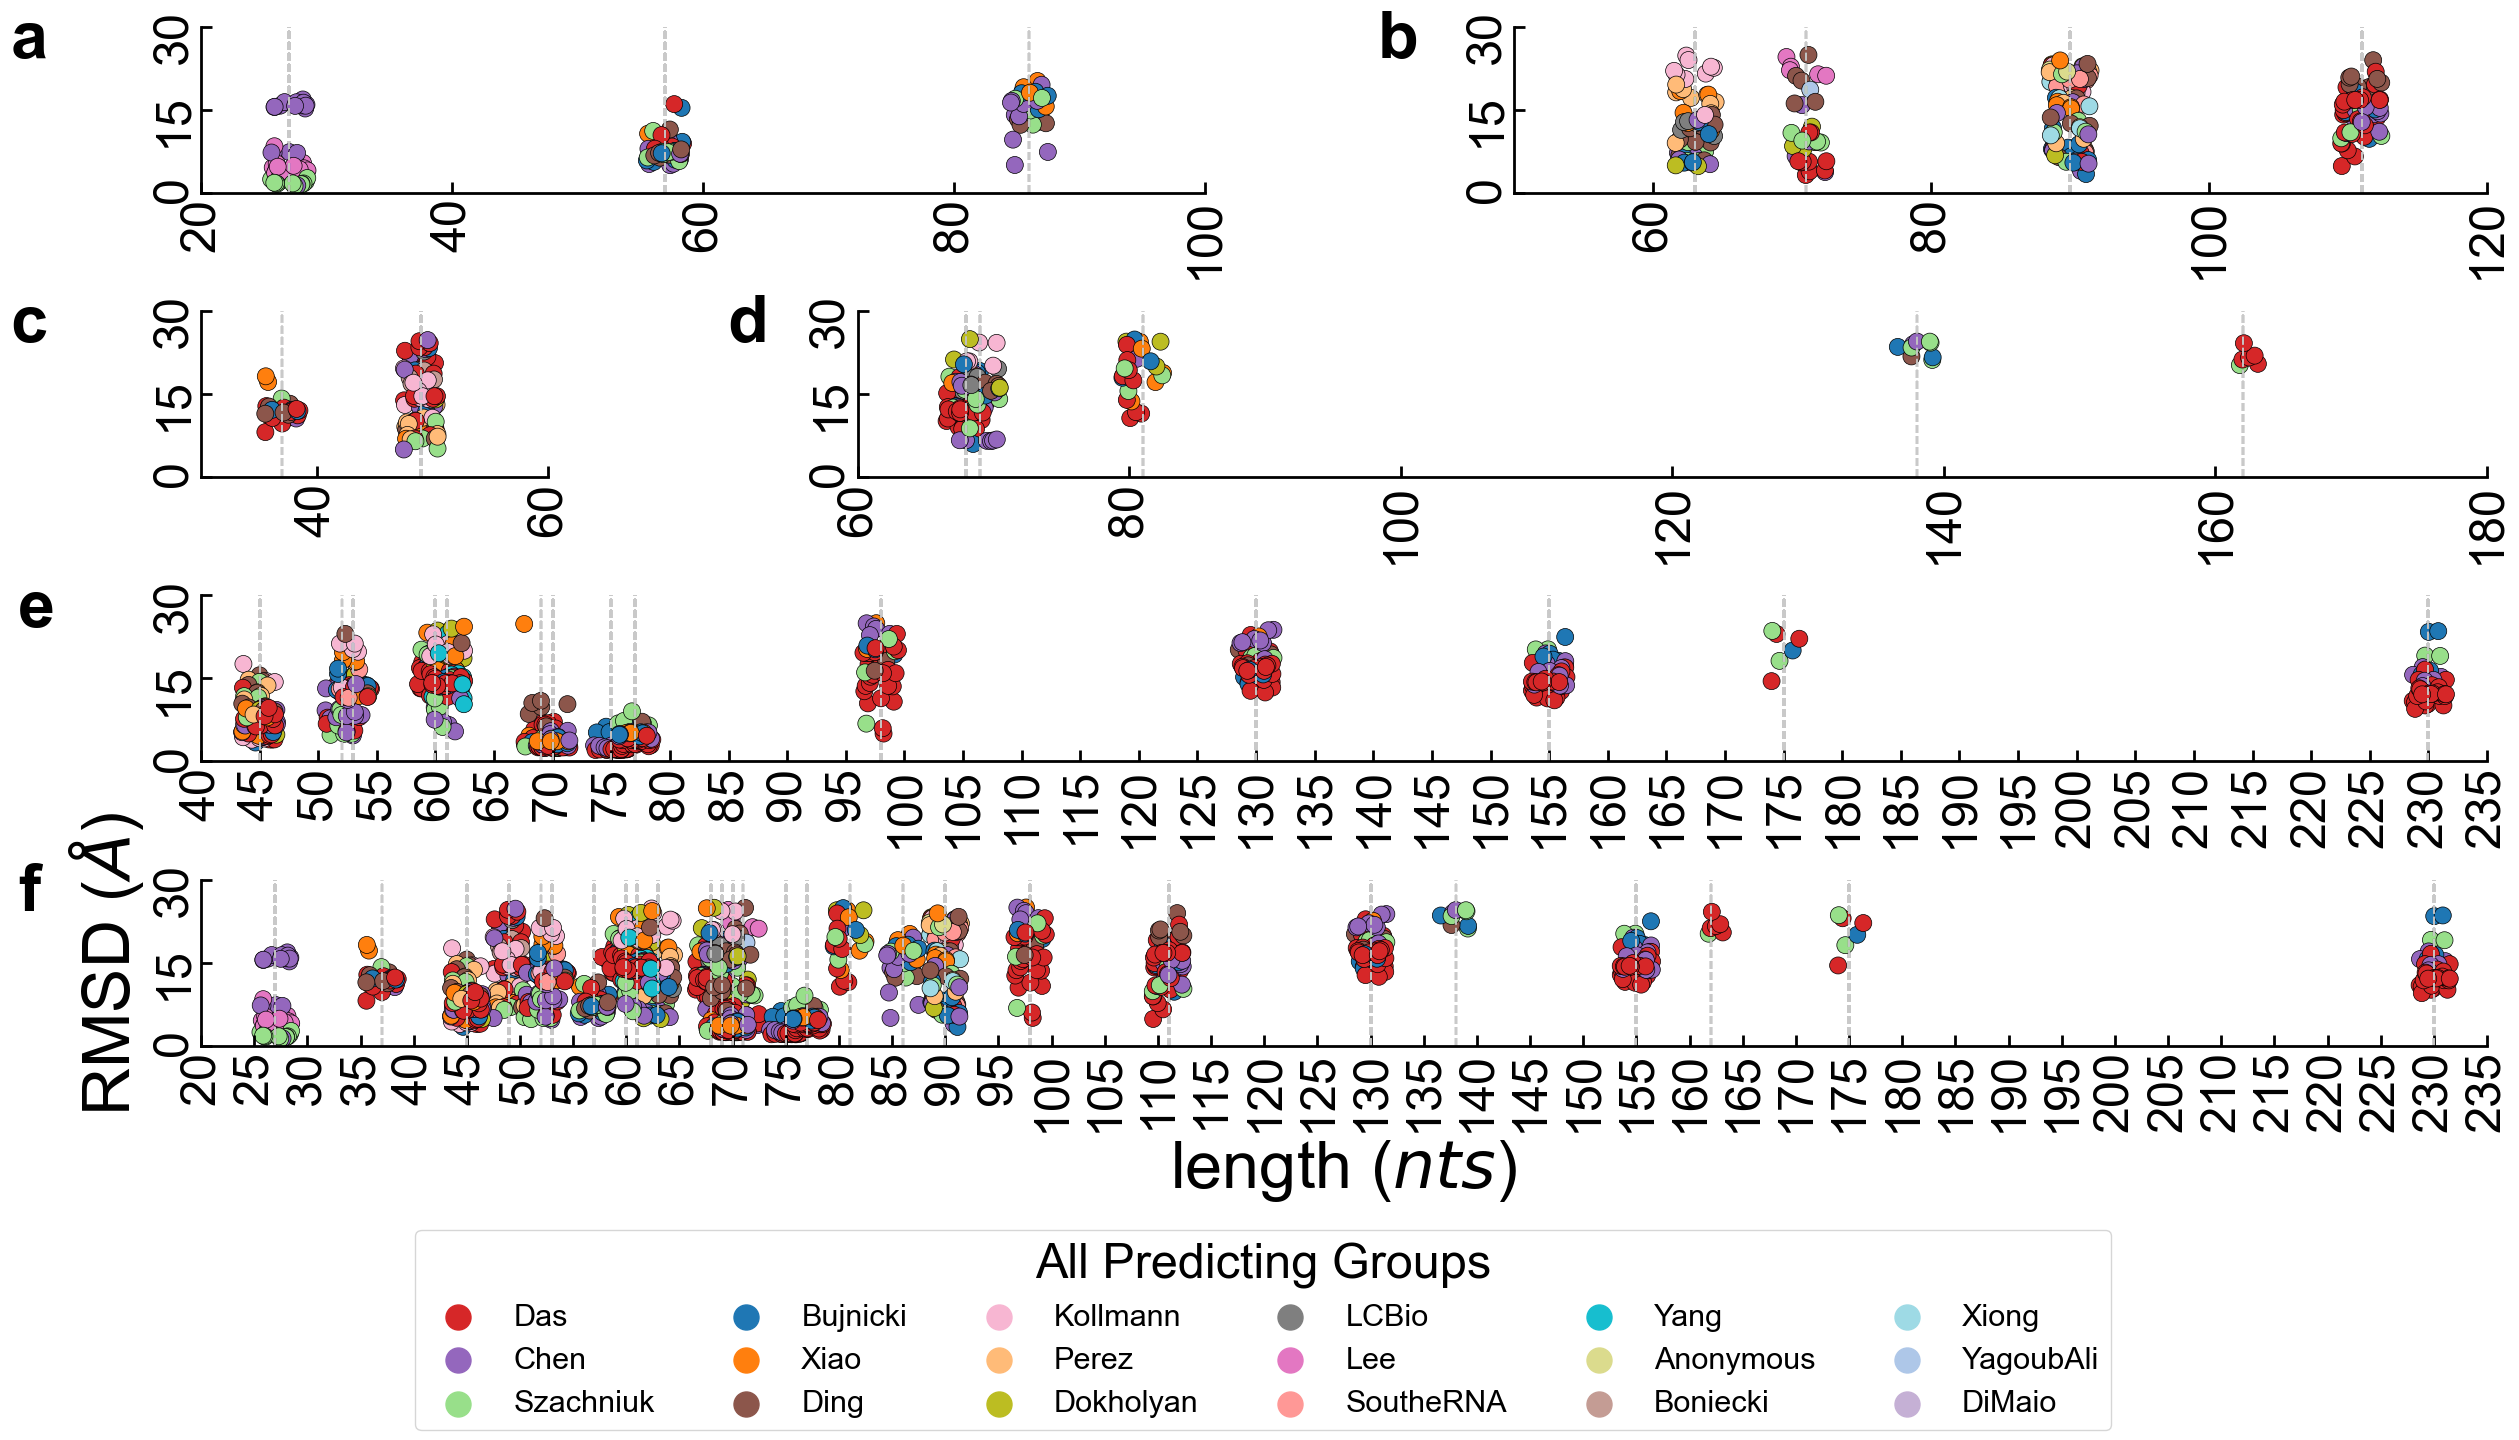

In [18]:
# Create a grid layout with 5 subgraphs
fig = plt.figure(constrained_layout=True, figsize=(25, 12),)
gs = gridspec.GridSpec(4, 4, figure=fig,wspace =0.05,hspace=0.05)
params={
    'font.family':'Arial',
    'font.size':35}
plt.rcParams.update(params)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.despine()
# Place subgraphs in the grid layout
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[0, 2:])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1:])
ax5 = fig.add_subplot(gs[2, :])
ax6 = fig.add_subplot(gs[3, :])


line_color='#c9c9c9'



# Scatterplotting
sns.scatterplot(x='length_shift', y='RMSD', data=df_RNA_elements[df_RNA_elements['RMSD'] <= 25], linewidth=0.5, ax=ax1,hue='Groups_new',palette=color_map,edgecolor='black',s=150)
# Setting labels and scales
ax1.set_ylim(0, 25)
ax1.tick_params(rotation=90)
ax1.set_xlim(20, 100)
ax1.legend_.remove()
for xi in df_RNA_elements['length']:
    ax1.axvline(x=xi, linestyle='--', color=line_color, alpha=0.1)


# Scatterplotting
sns.scatterplot(x='length_shift', y='RMSD', data=df_viral_elements[df_viral_elements['RMSD'] <= 25], linewidth=0.5, ax=ax2,hue='Groups_new',palette=color_map,edgecolor='black',s=150)

# Setting labels and scales
ax2.set_ylim(0, 25)
ax2.set_xlim(50, 120)
ax2.tick_params(rotation=90)
ax2.legend_.remove()
for xi in df_viral_elements['length']:
    ax2.axvline(x=xi, linestyle='--', color=line_color, alpha=0.1)


sns.scatterplot(x='length_shift', y='RMSD', data=df_aptamers[df_aptamers['RMSD'] <= 25], linewidth=0.5, ax=ax3,hue='Groups_new',palette=color_map,edgecolor='black',s=150)

ax3.set_ylim(0, 25)
ax3.set_xlim(30, 60)
ax3.tick_params(rotation=90)
ax3.legend_.remove()
for xi in df_aptamers['length']:
    ax3.axvline(x=xi, linestyle='--', color=line_color, alpha=0.1)

    
    
sns.scatterplot(x='length_shift', y='RMSD', data=df_ribozymes[df_ribozymes['RMSD'] <= 25], linewidth=0.5, ax=ax4,hue='Groups_new',palette=color_map,edgecolor='black',s=150)
ax4.legend_.remove()

ax4.set_xlim(60, 180)
ax4.set_ylim(0, 25)
ax4.tick_params(rotation=90)
for xi in df_ribozymes['length']:
    ax4.axvline(x=xi, linestyle='--', color=line_color, alpha=0.1)



sns.scatterplot(x='length_shift', y='RMSD', data=df_riboswitches[df_riboswitches['RMSD'] <= 25], linewidth=0.5, ax=ax5,hue='Groups_new',palette=color_map,edgecolor='black',s=150)


ax5.set_ylim(0, 25)
ax5.set_xlim(40, 235)
ax5.set_xticks(np.arange(40, 240, 5))
ax5.tick_params(rotation=90)
ax5.legend_.remove()
ax5.set_xlabel("length ($nts$)")
ax5.set_ylabel("RMSD ($\AA$)")
for xi in df_riboswitches['length']:
    ax5.axvline(x=xi, linestyle='--', color=line_color, alpha=0.1)



sns.scatterplot(x='length_shift', y='RMSD', data=df_human_sorted[df_human_sorted['RMSD'] <= 25], linewidth=0.5, ax=ax6,hue='Groups_new',palette=color_map,edgecolor='black',s=150)


ax6.set_ylim(0, 25)
ax6.set_xlim(20, 235)
ax6.set_xticks(np.arange(20, 240, 5))
ax6.tick_params(rotation=90)
ax6.legend_.remove()
ax6.set_xlabel("length ($nts$)",fontsize=48)
ax6.set_ylabel("RMSD ($\AA$)",fontsize=48)
for xi in df_human_sorted['length']:
    ax6.axvline(x=xi, linestyle='--', color=line_color, alpha=0.1)

    
    
    
    
# Show legend
# 1. get handles and labels for each subfigure ax
handles, labels = [], []

for ax in [ax1, ax2, ax3, ax4, ax5,ax6]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

# 2. & 3. Merge these handles and labels and de-weight them.
legend_dict = dict(zip(labels, handles))  # Use a dictionary to de-duplicate and keep the last occurrence of handle.
labels_unique = list(legend_dict.keys())
handles_unique = [legend_dict[label] for label in labels_unique]
# Show legend
#handles, labels = ax4.get_legend_handles_labels()
fig.legend(sort_legend(labels_unique,handles_unique)[0],sort_legend(labels_unique,handles_unique)[1], title="All Predicting Groups", loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=6, prop={'size': 22},markerscale=3)



for ax in [ax1, ax2, ax3, ax4,ax5]:
    ax.set_xlabel('')
    ax.set_ylabel('')
    
for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_yticks([0,15,30])
    ax.spines['left'].set_linewidth(2)   # Left axis
    ax.spines['bottom'].set_linewidth(2)  # Right axis
    ax.tick_params(axis='both',          # Applied to the x- and y-axes
               direction='in',       # Scale lines facing inwards
               length=8,            # Length of the scale
               width=2)             # Thickness of the scale


    


# Show subgraph labels
ax1.text(-0.19, 1.1, 'a', transform=ax1.transAxes, fontsize=48, verticalalignment='top', horizontalalignment='left',fontweight='bold')
ax2.text(-0.14, 1.1, 'b', transform=ax2.transAxes, fontsize=48, verticalalignment='top', horizontalalignment='left',fontweight='bold')
ax3.text(-0.55, 1.1, 'c', transform=ax3.transAxes, fontsize=48, verticalalignment='top', horizontalalignment='left',fontweight='bold')
ax4.text(-0.08, 1.1, 'd', transform=ax4.transAxes, fontsize=48, verticalalignment='top', horizontalalignment='left',fontweight='bold')
ax5.text(-0.08, 1.1, 'e', transform=ax5.transAxes, fontsize=48, verticalalignment='top', horizontalalignment='left',fontweight='bold')
ax6.text(-0.08, 1.1, 'f', transform=ax6.transAxes, fontsize=48, verticalalignment='top', horizontalalignment='left',fontweight='bold')



plt.savefig("./scores/Figure3/Figure3_pannelA.pdf",bbox_inches='tight',format='pdf') 
plt.show()

# Figure3: Panel B

In [19]:
def filter_min_rmsd_rank(df):
    """
    Group the PZ columns of df, within each PZ group, then group them according to group_new, and then keep only the rows with the smallest RMSD_rank in each subgroup.

    Args.
        df (DataFrame): a DataFrame with PZ, group_new and RMSD_rank columns.

    Returns.
        DataFrame: A new DataFrame consisting of the rows with the smallest RMSD_rank in each PZ and group_new combination.
    """
    
    return df.loc[df.groupby(['PZ', 'Groups_new'])['RMSD_rank'].idxmin()].reset_index(drop=True)
def transform_df(df):
    """
    Converts each value in the DataFrame: subtracts each value from 6 and converts to 0 if the result is negative.
    If the original value is NaN, leave it unchanged.

    Args.
        df (DataFrame): The original DataFrame.

    Returns.
        DataFrame: The converted DataFrame.
    """
    def transform_value(value):
        if pd.isna(value):
            return value
        return max(0, 6 - value)
    
    return df.applymap(transform_value)

In [20]:
#Read the RMSD score in human and server respectively.
df_humanRMSD=pd.read_csv('./scores/Figure3/df_humanRMSD.csv')
df_serverRMSD=pd.read_csv('./scores/Figure3/df_serverRMSD.csv')
#Only the model with the smallest RMSD value in each group was retained in each Puzzles as the representative model for that group and included in the scoring process.
df_humanRMSD_extract=filter_min_rmsd_rank(df_humanRMSD)
df_serverRMSD_extract=filter_min_rmsd_rank(df_serverRMSD)

In [21]:
# Get the unique value of the PZ column, keeping the original order
puzzle_order=['PZ11','PZ16a','PZ16b','PZ30','PZ23','PZ32',
              'PZ18','PZ24','PZ31','PZ39',
              'PZ22','PZ22Dimer','PZ34','PZ35','PZ36',
              'PZ25','PZ26','PZ26tBox','PZ26tRNA','PZ27','PZ27tBox','PZ27tRNA','PZ28','PZ28tBox','PZ28tRNA','PZ29','PZ33','PZ37','PZ38']

# Creating Pivot Tables
pivot_df_humanRMSD_extratc = df_humanRMSD_extract.pivot_table(
    index='Groups_new', 
    columns='PZ', 
    values='RMSD_rank', 
    dropna=False
)

# Resequencing in the original PZ order.
pivot_df_humanRMSD_extratc = pivot_df_humanRMSD_extratc.reindex(columns=puzzle_order)
pivot_df_serverRMSD_extratc = df_serverRMSD_extract.pivot_table(
    index='Groups_new', 
    columns='PZ', 
    values='RMSD_rank', 
    dropna=False
)
pivot_df_serverRMSD_extratc = pivot_df_serverRMSD_extratc.reindex(columns=puzzle_order)


In [22]:
pivot_df_humanRMSD_extratc=transform_df(pivot_df_humanRMSD_extratc.copy())
pivot_df_serverRMSD_extratc=transform_df(pivot_df_serverRMSD_extratc.copy())

In [23]:
column_=['PZ11', 'PZ16a', 'PZ16b', 'PZ30', 'PZ23', 'PZ32', 'PZ18', 'PZ24',
       'PZ31', 'PZ39', 'PZ22', 'PZ22Dimer', 'PZ34', 'PZ35', 'PZ36', 'PZ25',
       'PZ26', 'PZ26tBox', 'PZ26tRNA', 'PZ27', 'PZ27tBox', 'PZ27tRNA', 'PZ28',
       'PZ28tBox', 'PZ28tRNA', 'PZ29', 'PZ33', 'PZ37', 'PZ38']
def add_value_column_addNANonly(df):
    # Replace a non-NaN value in a column that has only one such value with NaN
    def replace_unique_values_with_nan(df):
        for col in df.columns:
            if df[col].nunique(dropna=True) == 1:
                unique_value = df[col].dropna().unique()[0]
                df[col] = df[col].replace(unique_value, float('nan'))
        return df

    # Replaced DataFrame
    replaced_df = replace_unique_values_with_nan(df.copy())
    replaced_df1=replaced_df.copy()
    # Calculate sum_all for each row (sum of all columns)
    replaced_df1['sum_all'] = replaced_df.sum(axis=1)

    # Calculate num (number of non-NaN values) per line
    replaced_df1['num'] = replaced_df.count(axis=1)

    # Apply the formula to the value column
    replaced_df1['value'] = replaced_df1['sum_all'] * replaced_df1['num'] / 29

    return replaced_df1

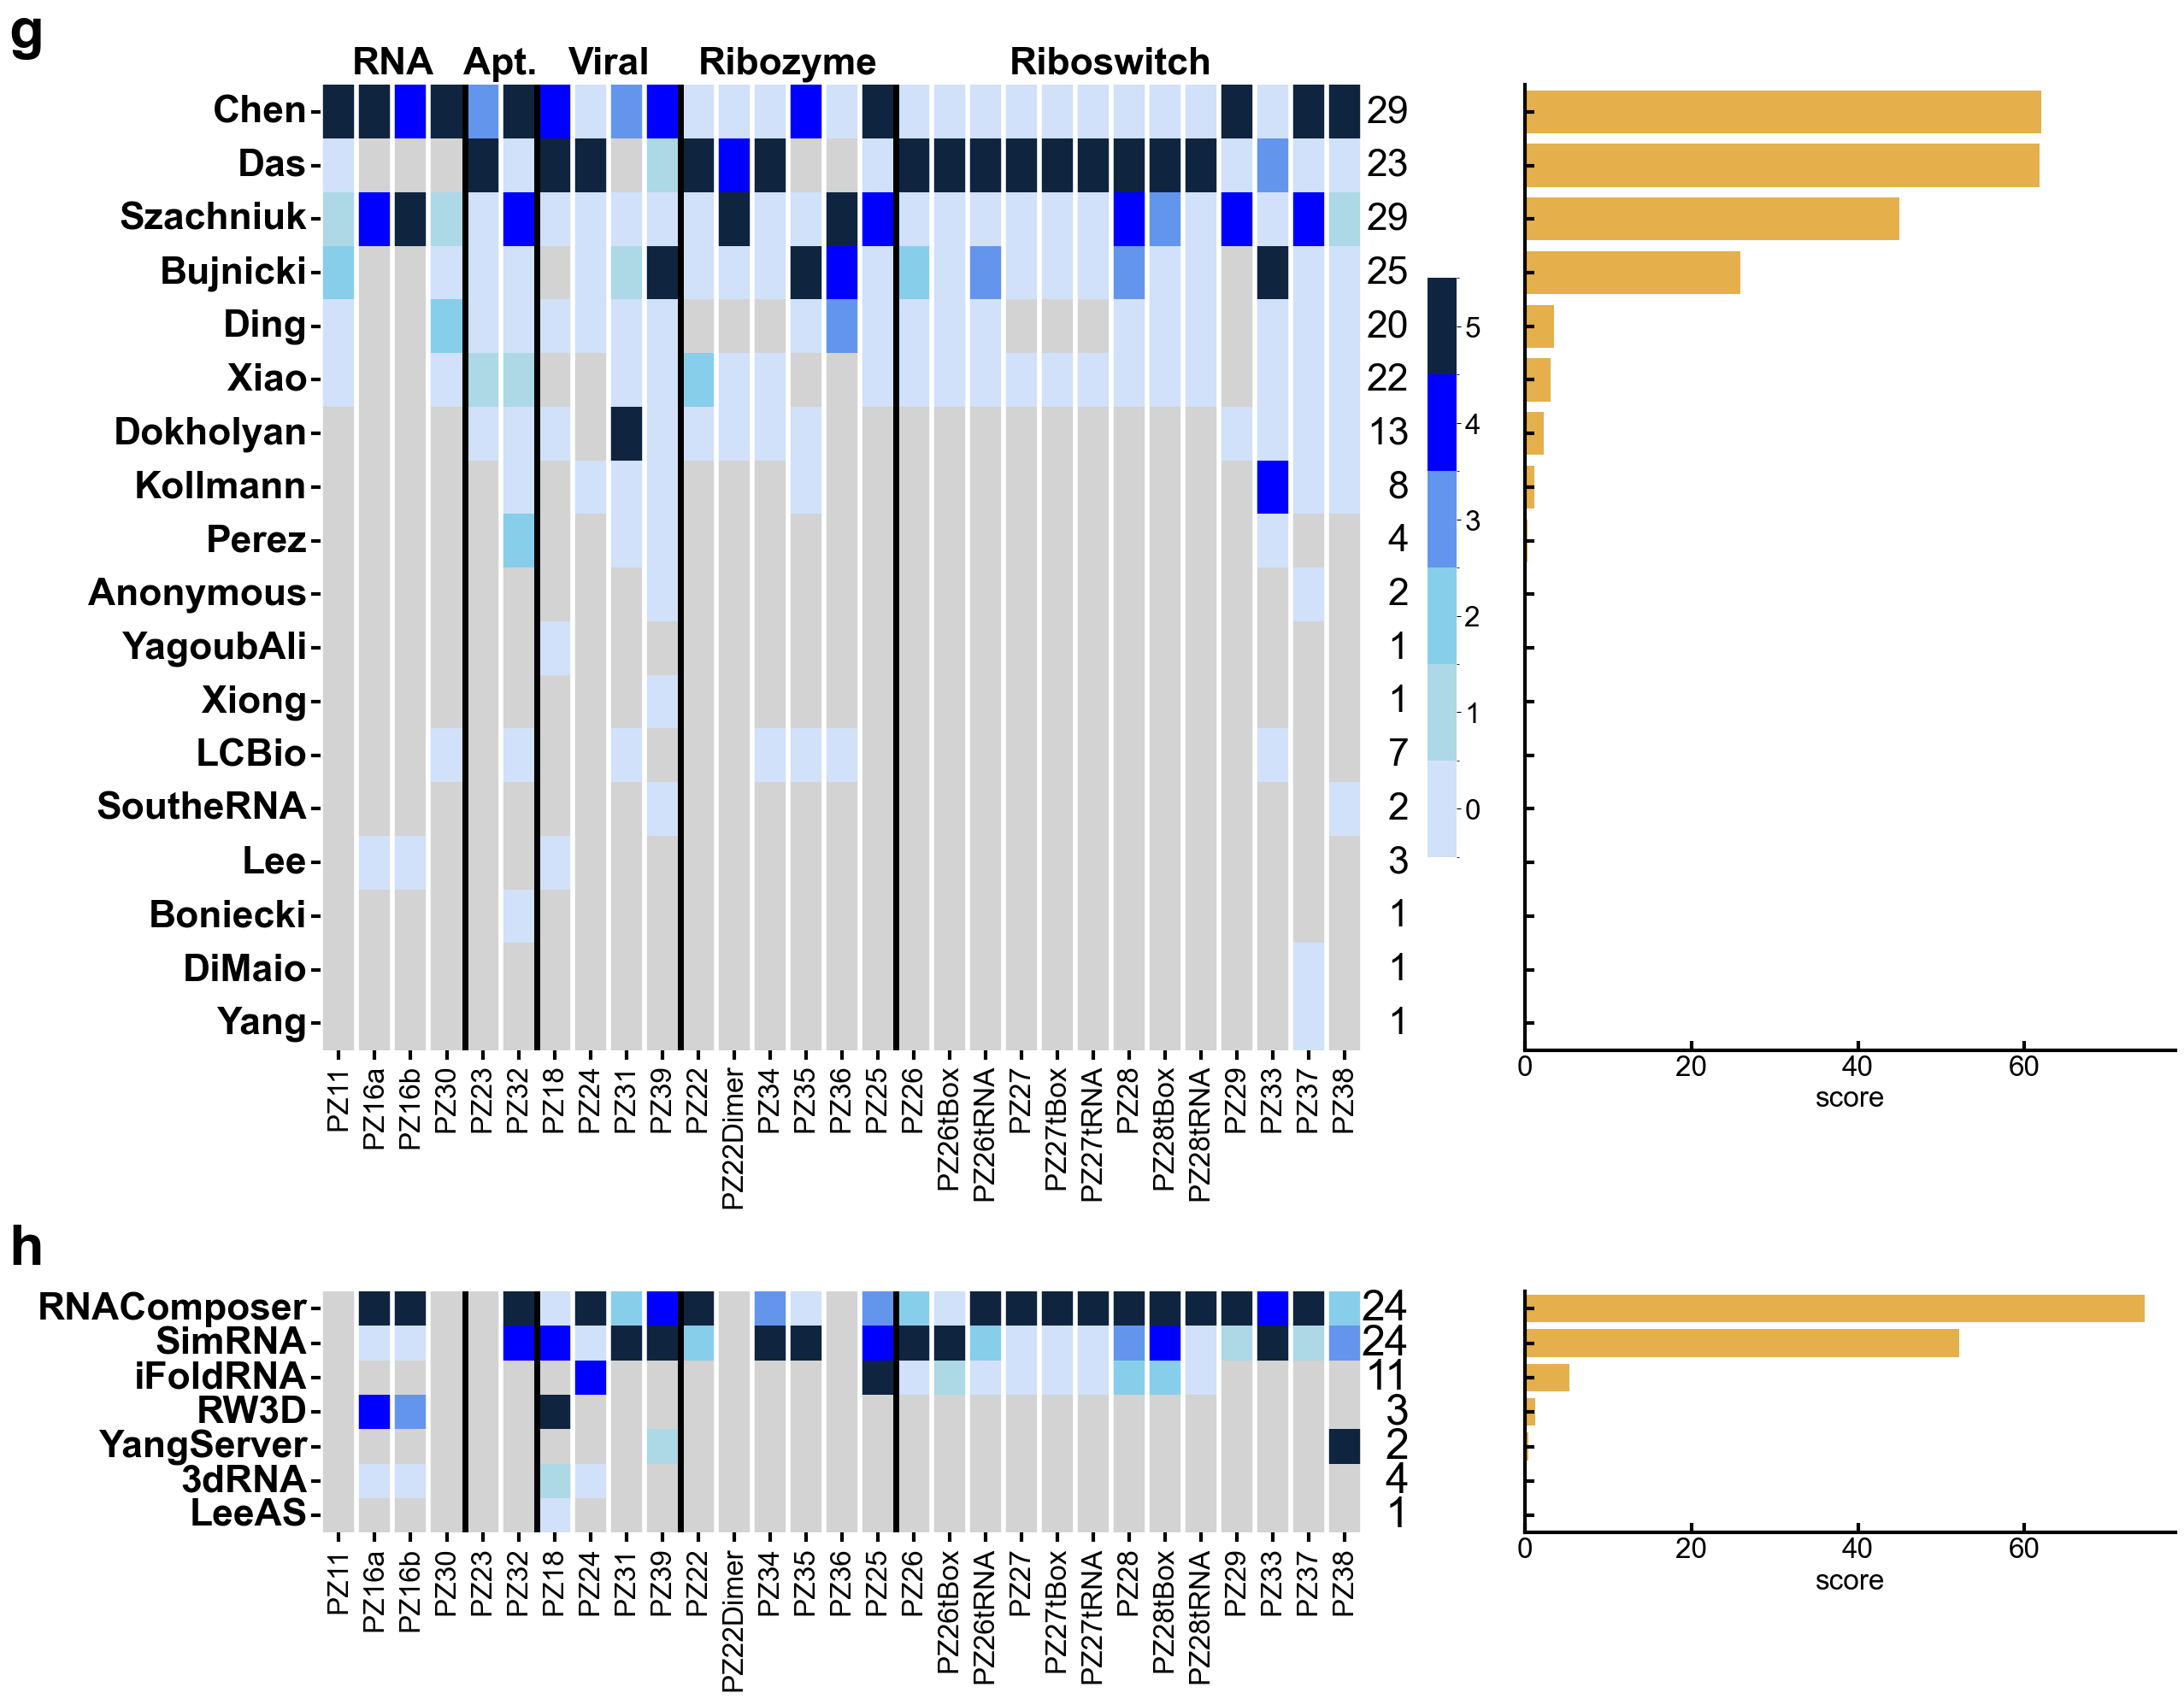

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm,LinearSegmentedColormap
import numpy as np
params={
    'font.family':'Arial',
    'font.size':24}
plt.rcParams.update(params)

fig, axes = plt.subplots(2, 2, figsize=(28, 22), gridspec_kw={'width_ratios': [2, 1],'height_ratios': [4, 1]})
fig.subplots_adjust(wspace=-0.1,hspace=0.4)
pivot_df_humanRMSD_extratc=add_value_column_addNANonly(pivot_df_humanRMSD_extratc)

# Sorting a DataFrame by the 'Total' column
pivot_df_humanRMSD_extratc.sort_values(by='value', ascending=False, inplace=True)
pivot_df_humanRMSD_extratc_reset = pivot_df_humanRMSD_extratc.reset_index()
human_num=pivot_df_humanRMSD_extratc_reset['num']
# Call the barh method on the axis object to draw horizontal bars.
sns.barplot(x='value', y='Groups_new', data=pivot_df_humanRMSD_extratc_reset,color='#ffb732',ax=axes[0,1])
axes[0,1].set_yticklabels(labels=axes[0,1].get_yticklabels(),rotation = 0, size=32,fontweight='bold')
axes[0,1].set_xlabel('score')  # x-axis labels
axes[0,1].set_ylabel('')        # y-axis labels



# If you don't want to show the 'Total' column in the heatmap, you can remove it before plotting.
pivot_df_humanRMSD_extratc.drop(columns=['sum_all','num','value'], inplace=True)

# Defining the colour mapping
cmap = LinearSegmentedColormap.from_list(
    'custom_blue', 
    ['#d0e1f9', '#add8e6', '#87ceeb', '#6495ed', '#0000ff', '#0f243e'], 
    N=6
)

# Define the boundaries of the colour scale
bounds = np.arange(-0.5, 6, 1)
norm = BoundaryNorm(bounds, cmap.N)

# Setting up the heat map
axes[0,0].set_facecolor('lightgrey')
mask = np.isnan(pivot_df_humanRMSD_extratc)
g=sns.heatmap(pivot_df_humanRMSD_extratc, cmap=cmap, norm=norm, ax=axes[0,0], 
            cbar_kws={'shrink': 0.6, 'ticks': np.arange(0, 6)}, mask=mask, )
g.set_ylabel('')
g.set_xlabel('')
g.set_yticklabels(labels=g.get_yticklabels(),rotation = 0, size=32,fontweight='bold')
for i in range(pivot_df_humanRMSD_extratc.shape[1]+1):
    g.axvline(i, color='white', lw=4)

# Annotate text above each category
category_centers = {2: "RNA",#4
                    5: "Apt.",#2
                    8: "Viral",#4
                    13 : "Ribozyme",#6
                    22 : "Riboswitch"#14
                    }

for center in category_centers:
    g.text(center, -0.4, category_centers[center], ha="center", va="center", color="black", size=32, fontweight='bold')
# Add text to the right border
assert len(human_num) == pivot_df_humanRMSD_extratc.shape[0], "The length of the text list must be the same as the number of lines"

# Add text to the right side of each line
for i, text in enumerate(human_num):
    x_coord = pivot_df_humanRMSD_extratc.shape[1] + 1.3  # x-coordinate, slightly beyond the far right of the heatmap
    y_coord = i+0.5  # y coordinate, corresponding to each row

    g.text(x_coord, y_coord, text, va="center", ha="right", color="black", size=32)



gaps_to_draw = [4,6,10,16]
for gap in gaps_to_draw:
    g.axvline(gap, color='black', lw=5)

    
axes[0,1].spines['right'].set_visible(False)
axes[1,1].spines['right'].set_visible(False)
axes[0,1].spines['top'].set_visible(False)
axes[1,1].spines['top'].set_visible(False)
axes[0,0].text(-0.3, 1.08, "g", transform=axes[0,0].transAxes,va='top', ha='left',fontweight='bold',fontsize=48)
axes[1,0].text(-0.3, -0.18, "h", transform=axes[0,0].transAxes,va='top', ha='left',fontweight='bold',fontsize=48)



######################
pivot_df_serverRMSD_extratc=add_value_column_addNANonly(pivot_df_serverRMSD_extratc)

# Sort the DataFrame based on the 'Total' column
pivot_df_serverRMSD_extratc.sort_values(by='value', ascending=False, inplace=True)
pivot_df_serverRMSD_extratc_reset = pivot_df_serverRMSD_extratc.reset_index()
server_num=pivot_df_serverRMSD_extratc_reset['num']
# Call the barh method on the axis object to draw a horizontal bar chart
sns.barplot(x='value', y='Groups_new', data=pivot_df_serverRMSD_extratc_reset,color='#ffb732',ax=axes[1,1])
axes[1,1].set_yticklabels(labels=axes[1,1].get_yticklabels(),rotation = 0, size=30,fontweight='bold')
axes[1,1].set_xlabel('score')  # x-axis label
axes[1,1].set_ylabel('')        # y-axis label

# If you don't want the 'Total' column to appear in the heatmap, you can delete it before plotting
pivot_df_serverRMSD_extratc.drop(columns=['sum_all','num','value'], inplace=True)



# Set up heatmap
axes[1,0].set_facecolor('lightgrey')

mask = np.isnan(pivot_df_serverRMSD_extratc)
g2=sns.heatmap(pivot_df_serverRMSD_extratc, cmap=cmap, norm=norm, ax=axes[1,0], 
            cbar_kws={'shrink': 0.6, 'ticks': np.arange(0, 6)}, mask=mask,cbar=True)
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticklabels(labels=g2.get_yticklabels(),rotation = 0, size=32,fontweight='bold')
for i in range(pivot_df_serverRMSD_extratc.shape[1]+1):
    g2.axvline(i, color='white', lw=4)







for gap in gaps_to_draw:
    g.axvline(gap, color='black', lw=5)
    

for gap in gaps_to_draw:
    g2.axvline(gap, color='black', lw=5)

cbar_ax = g2.collections[0].colorbar.ax
pos = cbar_ax.get_position()

# Calculate the size and position of the rectangle used to cover the color scale and scale
# Increase the width and height of the rectangle to ensure the tick values are covered
new_width = pos.width * 8.5
new_height = pos.height * 1.1
new_x = pos.x0 - (new_width - pos.width) / 3.5
new_y = pos.y0 - (new_height - pos.height) / 2

# Draw a white rectangle at the location of the color scale to cover it and its scale values
fig.patches.extend([plt.Rectangle((new_x, new_y), new_width, new_height, 
                                  fill=True, color='white', transform=fig.transFigure, figure=fig)])

assert len(server_num) == pivot_df_serverRMSD_extratc.shape[0], "The length of the text list must be the same as the number of lines"

# Add text to the right of each line
for i, text in enumerate(server_num):
    x_coord = pivot_df_serverRMSD_extratc.shape[1] + 1.3  # x coordinate, slightly beyond the rightmost side of the heatmap
    y_coord = i+0.5  # y coordinate, corresponding to each row

    g2.text(x_coord, y_coord, text, va="center", ha="right", color="black", size=36)





for ax in [axes[0,1],axes[1,1]]:
    ax.spines['left'].set_linewidth(3)   # Left axis
    ax.spines['bottom'].set_linewidth(3)  # right axis
    ax.tick_params(axis='both',          # Applies to x-axis and y-axis
               direction='in',       # The tick mark faces inward
               length=8,            # The length of the tick mark
               width=3)              # The thickness of the tick marks

for ax in [axes[0,0],axes[1,0]]:
    ax.tick_params(axis='both',          # Applies to x-axis and y-axis
               direction='out',       # The tick mark faces inward
               length=8,            # The length of the tick mark
               width=3)          

# # 获取两个图的y轴最大值
max_xlim = max(axes[0,1].get_xlim()[1], axes[1,1].get_xlim()[1])

# 设置相同的y轴范围
axes[0,1].set_xlim(0, max_xlim)
axes[1,1].set_xlim(0, max_xlim)

####
axes[0, 1].set_yticklabels([])
axes[1, 1].set_yticklabels([])
plt.savefig("./scores/Figure3/Figure3_pannelB.pdf", bbox_inches='tight')
plt.show()

# Figure6

In [25]:
df_fig6=pd.read_csv('./scores/Figure6/metrix_all_submitted_predicted_models.csv')

In [26]:

def generate_lowercase_list(nums):
    product = 1
    for num in nums:
        product *= num
    
    alphabet = list(string.ascii_lowercase)
    result = alphabet[:product]
    return result


def striplot_drawing_addline(lay_list, info_dic):
    params={
    'font.family':'Arial',
    'font.size':12}
    plt.rcParams.update(params)
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    #plt.rcParams['font.size'] = 10 When there are a small number of parameters, you can set them directly
    fig = plt.figure(constrained_layout=True, figsize=info_dic['figure_size'][0])
    gs = gridspec.GridSpec(lay_list[0], lay_list[1], figure=fig)
    label_li = generate_lowercase_list(lay_list)
    num = 0
    axes_dict = {}
    for i in range(lay_list[0]):
        for j in range(lay_list[1]):
            num += 1
            ax = fig.add_subplot(gs[i, j])
            axes_dict[f"ax{num}"] = ax
    sns.despine()  #removing the top and right border lines   
    for i, ax_key in enumerate(axes_dict.keys()):
        ax = axes_dict[ax_key]
       
        ax = sns.stripplot(x=info_dic[ax_key][0], y=info_dic[ax_key][1], data=info_dic[ax_key][3],
                           linewidth=0.5,palette=info_dic['color'][0], ax=ax)
        ax.set_xlabel(info_dic[ax_key][2])
        ax.tick_params(rotation=90)
        ax.set_ylim(info_dic[ax_key][4])
        ax.set_ylabel(info_dic[ax_key][5])
        #ax.set_yticks(ticks=info_dic[ax_key][11], labels=info_dic[ax_key][11],rotation=70)
        ax.set_yticks(ticks=info_dic[ax_key][11])
        ax.set_yticklabels(labels=info_dic[ax_key][11], rotation=90)
        #ax.set_yticklabels(info_dic[ax_key][11])
        
        ax.annotate(label_li[i], (-4, 1.05), size=16, xycoords=ax.get_xaxis_transform(), weight='bold')
       
        #Add line:
        if info_dic[ax_key][6]=='yes':
            # Calculate the relative position of y=3 within the y-axis range
            ymin, ymax = ax.get_ylim()
            for i in range(info_dic[ax_key][7]):
                y_fraction = (info_dic[ax_key][9][i] - ymin) / (ymax - ymin)
                ax.annotate('', xy=(1.06, y_fraction), xycoords='axes fraction', xytext=(0, y_fraction),
                            textcoords='axes fraction', arrowprops=dict(arrowstyle='-', color=info_dic[ax_key][8][i],linewidth=info_dic[ax_key][10][i]))
        #ax.legend_.remove()
  
    fig.tight_layout()
    
    plt.subplots_adjust(wspace =0.2, hspace =0.9)#Adjust sub-picture spacing
    plt.savefig(info_dic['pdf_name'][0],bbox_inches='tight') 
    plt.show()

    


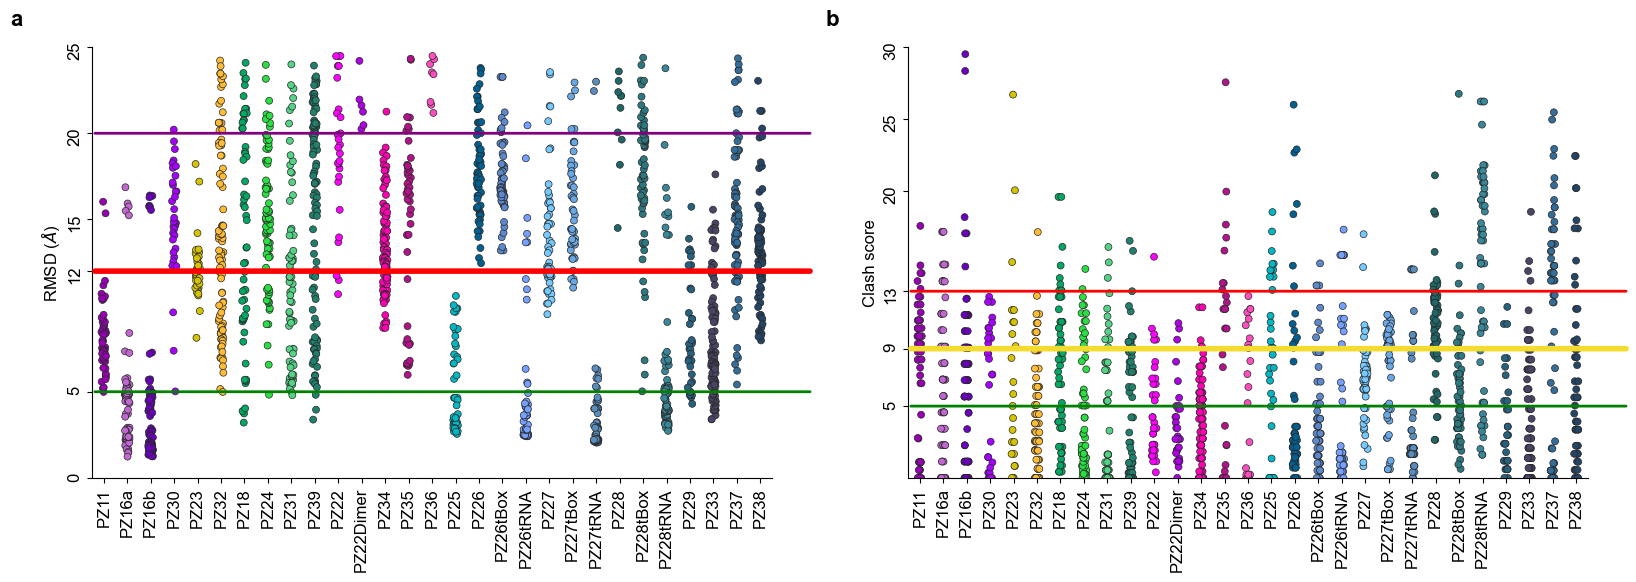

In [27]:
lay_list = [1, 2]
puzzle_color_selected= {'PZ11': '#9900B3', 'PZ16a': '#C266D1', 'PZ16b': '#6C00BF', 'PZ30': '#A700FF', 'PZ23': '#D6C300', 'PZ32': '#FFBB33', 'PZ18': '#00A863', 'PZ24': '#29E043', 'PZ31': '#53D385', 'PZ39': '#1E806D', 'PZ22': '#FF00FF', 'PZ22Dimer': '#AF00E6', 'PZ34': '#FF00B3', 'PZ35': '#B3128A', 'PZ36': '#FF4DC1', 'PZ25': '#00B8C3', 'PZ26': '#006091', 'PZ26tBox': '#5C89CC', 'PZ26tRNA': '#74A0FF', 'PZ27': '#74CAFF', 'PZ27tBox': '#69A8E6', 'PZ27tRNA': '#578EBF', 'PZ28': '#1F6666', 'PZ28tBox': '#2B7880', 'PZ28tRNA': '#388899', 'PZ29': '#266180', 'PZ33': '#494566', 'PZ37': '#336D99', 'PZ38': '#254566'}
info_dic = {"ax1": ['PZ', 'RMSD', '', df_fig6[df_fig6['RMSD'] <= 24.5], [0, 25], 'RMSD ($\AA$)','yes',3,['green','red','purple'],[5,12,20],[2,4,2],[0,5,12,15,20,25]],
            "ax2": ['PZ', 'clash', '', df_fig6[df_fig6['clash']<=30], [0, 30], 'Clash score','yes',3,['green','#F6DB2F','red'],[5,9,13],[2,4,2],[5,9,13,20,25,30]],
            'color': [puzzle_color_selected],
            'figure_size':[(16, 6)],
            ''
            'pdf_name':["./scores/Figure6/Figure6jupyter_all_rmsd_clash.pdf"]
}
striplot_drawing_addline(lay_list, info_dic)

# Extended Data Figure 6

In [28]:
import pandas as pd

def process_data(df, sheet_name, excel_path="./scores/Extended_Data_Figure6/human_webserver_stastic.xlsx"):
    """
    Process the data to categorize groups and add a new column 'Groups_new'.

    Parameters:
    df (pd.DataFrame): DataFrame containing data.
    sheet_name (str): Sheet name in the Excel file containing group information.
    excel_path (str): Path to the Excel file containing group information.

    Returns:
    pd.DataFrame: Updated DataFrame with 'Groups_new' column.
    dict: Dictionary of groups with major names as keys and lists of groups as values.
    dict: Dictionary of PIs with major names as keys and lists of PI names as values (for server data).
    """
    # Read group information from the Excel file
    group_df = pd.read_excel(excel_path, sheet_name=sheet_name)
    
    # Build the group dictionary
    group_dict = {}
    for index, row in group_df.iterrows():
        group_dict[row['major_name']] = row['group'].split(',')
    #print(group_dict)

    # Initialize PI dictionary
    pi_dict = {}
    
    if sheet_name == "Server":
        # Build the PI dictionary for server data
        for index, row in group_df.iterrows():
            pi_dict[row['major_name']] = row['PI_name'].split(',')
        print(f"model_pi: {pi_dict}")

    # Create a category map from the group dictionary
    category_map = group_dict
    
    # Add a new column 'Groups_new' to the DataFrame
    # Assuming df['0'] is the column you're working with and category_map is defined
    df_copy = df.copy()
    # Apply the function safely using .loc
    df_copy.loc[:, 'Groups_new'] = df_copy['0'].apply(lambda x: [k for k, v in category_map.items() if x in v][0])
    
    if sheet_name == "Server":
        return df_copy, group_dict, pi_dict
    else:
        return df_copy, group_dict


In [29]:

PZ22=r'./scores/Extended_Data_Figure6/PZ22rmsd_deta.csv'
PZ34=r'./scores/Extended_Data_Figure6/PZ34rmsd_deta.csv'
df22=pd.read_csv(PZ22)
df34=pd.read_csv(PZ34)
dfPZ22_human=df22[df22['Category']=='Human']
dfPZ22_server=df22[df22['Category']=='Server']
dfPZ34_human=df34[df34['Category']=='Human']
dfPZ34_server=df34[df34['Category']=='Server']

In [30]:
# Call the function with the DataFrame and Excel file path
#dfPZ22_human = process_human_data(dfPZ22_human)
dfPZ22_human, human22_group_dict = process_data(dfPZ22_human, sheet_name="Human")
dfPZ22_human

0  model Category    RMSD  RMSD_rank  solution  \
0        Chen      3    Human  31.762         45         0   
1         Das      7    Human  21.158         20         0   
2     Adamiak      2    Human  19.653         16         0   
3         Das      3    Human  23.908         24         1   
4         Das      2    Human  11.732          3         1   
5         Das      1    Human  11.480          2         0   
6        Chen      5    Human  21.390         21         0   
7         Das      5    Human  10.663          1         1   
8         Das      4    Human  25.395         32         0   
9         Das     10    Human  19.334         15         1   
10       Chen      1    Human  26.820         35         1   
13    Adamiak      4    Human  18.394         12         0   
16    Adamiak      3    Human  27.938         40         0   
17       Chen      4    Human  25.355         31         1   
19        Das      6    Human  18.230         10         1   
20        Das      8    Human  13.960          5         1   
21    Adamiak      1    Human  28.834         42         1   
22       Xiao      4    Human  23.219         22         1   
23       Xiao      1    Human  13.678          4         1   
24       Chen      2    Human  26.154         33         0   
25       Xiao      5    Human  18.826         13         0   
26        Das      9    Human  17.484          8         1   
27       Xiao      2    Human  17.173          7         0   
28  Dokholyan      3    Human  24.478         26         0   
29    Adamiak      5    Human  15.558          6         0   
30   Bujnicki      1    Human  20.929         19         0   
32  Dokholyan      4    Human  24.487         27         1   
33   Bujnicki      2    Human  17.959          9         0   
34       Xiao      3    Human  24.468         25         0   
35  Dokholyan      1    Human  28.986         43         1   
36  Dokholyan      2    Human  29.496         44         1   
37  Dokholyan      5    Human  19.994         18         1   
38   Bujnicki      5    Human  24.870         29         1   
40   Bujnicki      3    Human  27.393         39         1   
44   Bujnicki      4    Human  26.946         36         1   

    specific_nucleotide_atom_rmsd  C1'_rmsd   completed_model  \
0                           5.534     3.698       PZ22_Chen_3   
1                           4.703     3.581        PZ22_Das_7   
2                           5.262     5.066    PZ22_Adamiak_2   
3                           6.018     6.656        PZ22_Das_3   
4                           4.806     5.655        PZ22_Das_2   
5                           7.028     5.995        PZ22_Das_1   
6                           5.887     5.537       PZ22_Chen_5   
7                           4.366     4.930        PZ22_Das_5   
8                           7.466     7.296        PZ22_Das_4   
9                           4.305     3.537       PZ22_Das_10   
10                          5.547     5.684       PZ22_Chen_1   
13                          6.714     5.764    PZ22_Adamiak_4   
16                          7.152     5.572    PZ22_Adamiak_3   
17                          6.104     6.980       PZ22_Chen_4   
19                          6.569     6.150        PZ22_Das_6   
20                          5.753     5.643        PZ22_Das_8   
21                          6.431     5.762    PZ22_Adamiak_1   
22                          4.930     4.462       PZ22_Xiao_4   
23                          6.887     8.268       PZ22_Xiao_1   
24                          9.409     7.887       PZ22_Chen_2   
25                          7.715     5.784       PZ22_Xiao_5   
26                          7.659     9.477        PZ22_Das_9   
27                         11.844    11.805       PZ22_Xiao_2   
28                         12.279    10.395  PZ22_Dokholyan_3   
29                         12.628    10.758    PZ22_Adamiak_5   
30                         14.159    13.170   PZ22_Bujnicki_1   
32                      

In [31]:
# Call the function with the DataFrame and Excel file path
# dfPZ34_human = process_human_data(dfPZ34_human)
# dfPZ34_human
dfPZ34_human, human34_group_dict = process_data(dfPZ34_human, sheet_name="Human")
dfPZ34_human

0  model Category    RMSD  RMSD_rank  solution  C1'_rmsd  \
0         Chen      3    Human   9.446          6         0     0.969   
1          Das      2    Human   8.961          3         0     2.101   
2       SWMapo      4    Human   8.961          3         0     2.101   
3    Szachniuk      3    Human  11.775         31         0     2.472   
4         Chen      4    Human  12.558         42         0     2.789   
..         ...    ...      ...     ...        ...       ...       ...   
96    Bujnicki      4    Human  19.172        100         0     8.365   
97     ARESapo      3    Human  14.670         73         0     8.488   
98     ARESgua      4    Human  14.373         72         0     9.751   
99         Das      6    Human  14.328         70         0     9.127   
100     SWMapo      7    Human  14.328         70         0     9.127   

      completed_model  Sum of absolute delta Groups_new  
0         PZ34_Chen_3                    3.3       Chen  
1          PZ34_Das_2                    8.3        Das  
2       PZ34_SWMapo_4                    8.3        Das  
3    PZ34_Szachniuk_3                    8.3  Szachniuk  
4         PZ34_Chen_4                    8.3       Chen  
..                ...                    ...        ...  
96    PZ34_Bujnicki_4                   34.0   Bujnicki  
97     PZ34_ARESapo_3                   34.2        Das  
98     PZ34_ARESgua_4                   34.5        Das  
99         PZ34_Das_6                   37.3        Das  
100     PZ34_SWMapo_7                   37.3        Das  

[91 rows x 10 columns]

In [32]:
dfPZ22_server, server_group_dict, server_pi_dict = process_data(dfPZ22_server, sheet_name="Server")
dfPZ22_server

model_pi: {'3dRNA': ['Xiao'], 'LeeAS': ['Lee'], 'RNAComposer': ['Szach/Adam'], 'RW3D': ['Das'], 'SimRNA': ['Bujnicki'], 'YangServer': ['Yang'], 'iFoldRNA': ['Dokholyan']}


0  model Category    RMSD  RMSD_rank  solution  \
11  RNAComposer      1   Server  18.264         11         0   
12  RNAComposer      2   Server  19.172         14         0   
14  RNAComposer      5   Server  28.232         41         1   
15  RNAComposer      4   Server  26.695         34         0   
18  RNAComposer      3   Server  19.912         17         1   
31       SimRNA      5   Server  23.906         23         0   
39       SimRNA      3   Server  24.862         28         1   
41       SimRNA      1   Server  27.385         38         1   
42       SimRNA      4   Server  25.304         30         1   
43       SimRNA      2   Server  26.950         37         1   

    specific_nucleotide_atom_rmsd  C1'_rmsd     completed_model  \
11                          6.431     5.528  PZ22_RNAComposer_1   
12                          6.419     5.630  PZ22_RNAComposer_2   
14                          4.693     4.732  PZ22_RNAComposer_5   
15                          7.286     6.239  PZ22_RNAComposer_4   
18                          6.438     5.466  PZ22_RNAComposer_3   
31                         14.981    13.211       PZ22_SimRNA_5   
39                         16.976    15.783       PZ22_SimRNA_3   
41                         17.321    17.102       PZ22_SimRNA_1   
42                         18.616    16.778       PZ22_SimRNA_4   
43                         19.385    17.335       PZ22_SimRNA_2   

    Sum of absolute delta   Groups_new  
11                   49.2  RNAComposer  
12                   49.5  RNAComposer  
14                   58.3  RNAComposer  
15                   59.0  RNAComposer  
18                   62.6  RNAComposer  
31                  125.8       SimRNA  
39                  169.2       SimRNA  
41                  173.1       SimRNA  
42                  181.3       SimRNA  
43                  188.8       SimRNA

In [33]:
dfPZ34_server, server_group_dict, server_pi_dict = process_data(dfPZ34_server, sheet_name="Server")
dfPZ34_server

model_pi: {'3dRNA': ['Xiao'], 'LeeAS': ['Lee'], 'RNAComposer': ['Szach/Adam'], 'RW3D': ['Das'], 'SimRNA': ['Bujnicki'], 'YangServer': ['Yang'], 'iFoldRNA': ['Dokholyan']}


0  model Category    RMSD  RMSD_rank  solution  C1'_rmsd  \
21  RNAComposer      4   Server  13.942         66         0     3.655   
23       SimRNA      5   Server  11.140         21         0     3.653   
44  RNAComposer      2   Server  15.925         85         0     4.020   
45       SimRNA      4   Server  10.598         12         0     5.117   
51  RNAComposer      1   Server  13.225         56         0     4.117   
54  RNAComposer      3   Server  12.141         35         0     5.586   
58       SimRNA      1   Server  14.250         68         0     5.421   
64  RNAComposer      5   Server  12.753         48         0     5.403   
71       SimRNA      3   Server  13.236         58         0     5.588   
91       SimRNA      2   Server  12.479         41         0     7.343   

       completed_model  Sum of absolute delta   Groups_new  
21  PZ34_RNAComposer_4                   12.7  RNAComposer  
23       PZ34_SimRNA_5                   13.4       SimRNA  
44  PZ34_RNAComposer_2                   16.4  RNAComposer  
45       PZ34_SimRNA_4                   16.6       SimRNA  
51  PZ34_RNAComposer_1                   17.0  RNAComposer  
54  PZ34_RNAComposer_3                   18.6  RNAComposer  
58       PZ34_SimRNA_1                   19.9       SimRNA  
64  PZ34_RNAComposer_5                   20.9  RNAComposer  
71       PZ34_SimRNA_3                   22.5       SimRNA  
91       PZ34_SimRNA_2                   30.0       SimRNA

In [34]:
df_22_34=pd.concat([dfPZ22_human,dfPZ34_human,dfPZ22_server,dfPZ34_server],axis=0)
df_22_34

0  model Category    RMSD  RMSD_rank  solution  \
0          Chen      3    Human  31.762         45         0   
1           Das      7    Human  21.158         20         0   
2       Adamiak      2    Human  19.653         16         0   
3           Das      3    Human  23.908         24         1   
4           Das      2    Human  11.732          3         1   
..          ...    ...      ...     ...        ...       ...   
54  RNAComposer      3   Server  12.141         35         0   
58       SimRNA      1   Server  14.250         68         0   
64  RNAComposer      5   Server  12.753         48         0   
71       SimRNA      3   Server  13.236         58         0   
91       SimRNA      2   Server  12.479         41         0   

    specific_nucleotide_atom_rmsd  C1'_rmsd     completed_model  \
0                           5.534     3.698         PZ22_Chen_3   
1                           4.703     3.581          PZ22_Das_7   
2                           5.262     5.066      PZ22_Adamiak_2   
3                           6.018     6.656          PZ22_Das_3   
4                           4.806     5.655          PZ22_Das_2   
..                            ...       ...                 ...   
54                            NaN     5.586  PZ34_RNAComposer_3   
58                            NaN     5.421       PZ34_SimRNA_1   
64                            NaN     5.403  PZ34_RNAComposer_5   
71                            NaN     5.588       PZ34_SimRNA_3   
91                            NaN     7.343       PZ34_SimRNA_2   

    Sum of absolute delta   Groups_new  
0                    33.2         Chen  
1                    38.4          Das  
2                    38.9    Szachniuk  
3                    40.2          Das  
4                    41.3          Das  
..                    ...          ...  
54                   18.6  RNAComposer  
58                   19.9       SimRNA  
64                   20.9  RNAComposer  
71                   22.5       SimRNA  
91                   30.0       SimRNA  

[146 rows x 11 columns]

In [35]:
groups_new_counts = df_22_34['Groups_new'].value_counts().to_dict()


# Reordering the dictionary by values in descending order
sorted_groups = sorted(groups_new_counts.items(), key=lambda item: item[1], reverse=True)

# Creating a new dictionary where the most frequent item corresponds to 1, and so on
ranked_groups = {group: rank for rank, (group, _) in enumerate(sorted_groups, start=1)}

group_sort=ranked_groups

group_sort

{'Das': 1,
 'Chen': 2,
 'Szachniuk': 3,
 'Xiao': 4,
 'Bujnicki': 5,
 'RNAComposer': 6,
 'SimRNA': 7,
 'Dokholyan': 8,
 'Nithin': 9}

In [36]:
#Define the following variables:
color_22=['#d62728',
          '#1f77b4',
          '#9467bd',
          '#2ca02c',
          '#ff7f0e',
          '#bcbd22',
          '#8c564b', 
          '#e377c2', 
          '#d6bcc0',
          'e377c2',
          '#7f7f7f', 
          '#17becf', 
          '#ff9896', 
          '#f7b6d2',
          '#f0b98d',
          '#c49c94',
          '#9edae5',
          '#aec7e8', 
          '#c5b0d5',
          '#98df8a',
          '#ffbb78',
          '#c7c7c7'         
]



#dbdb8d
#color_specific=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']

group_color=dict(zip(group_sort.keys(),color_22))
group_color['Nithin']='#ab9699'
group_color['RNAComposer']=group_color['Szachniuk']
group_color['3dRNA']=group_color['Xiao']
# group_color['LeeAS']=group_color['Lee']
group_color['SimRNA']=group_color['Bujnicki']
group_color['RW3D']=group_color['Das']
# group_color['YangServer']=group_color['Yang']
group_color['Others']="#e4e4e4"
print('group_color',group_color)





group_color {'Das': '#d62728', 'Chen': '#1f77b4', 'Szachniuk': '#9467bd', 'Xiao': '#2ca02c', 'Bujnicki': '#ff7f0e', 'RNAComposer': '#9467bd', 'SimRNA': '#ff7f0e', 'Dokholyan': '#e377c2', 'Nithin': '#ab9699', '3dRNA': '#2ca02c', 'RW3D': '#d62728', 'Others': '#e4e4e4'}


RMSD (based on selected atoms):P=0.00
RMSD (based on C1'):P=0.00
RMSD:P=0.19
RMSD:P=0.02


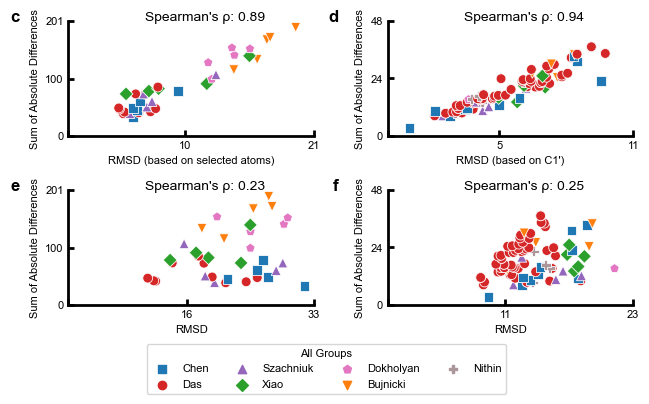

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
import matplotlib

def create_scatter_plots_nfigures(dfs, titles, group_color, group_style, subplot_labels,xlabels,pdfname,nfigures_list):
    """
    Create a 2x4 grid of scatter plots.

    Parameters:
    dfs (list): List of DataFrames to plot.
    titles (list): List of titles for each subplot.
    group_color (dict): Dictionary mapping group names to colors.
    group_style (dict): Dictionary mapping group names to marker styles.
    subplot_labels (list): List of labels for each subplot.
    """
    plt.rcParams.update({'font.size': 8})
    plt.rcParams['font.sans-serif'] = ['arial']
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    rows, cols = nfigures_list[0],nfigures_list[1]
    w, h = 3, 1.5
    wspace, hspace = 0.5, 0.5

    fig_width = cols * w + (cols - 1) * wspace
    fig_height = rows * h + (rows - 1) * hspace

    fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height),)

    handles, labels = [], []

    for i, (ax, df, title) in enumerate(zip(axes.flat, dfs, titles)):
        x_col =xlabels[i] 
        scatter_plot = sns.scatterplot(
            data=df,
            x=x_col,
            y="Sum of absolute delta",
            hue="Groups_new",
            palette=group_color,
            style="Groups_new",
            markers=group_style,
            s=50,
            ax=ax
        )

        spearman_corr, p = spearmanr(df[x_col], df["Sum of absolute delta"])
        #spearman_text = f"Spearman's ρ: {spearman_corr:.2f}\nP:{p:.2f}"
        spearman_text = f"Spearman's ρ: {spearman_corr:.2f}"
        print(f"{x_col}:P={p:.2f}")

        #scatter_plot.set_title(title)
        scatter_plot.set_xlabel(x_col)
        scatter_plot.set_ylabel("Sum of Absolute Differences")
        x_max = np.ceil(df[x_col].max())
        y_max = np.ceil(df["Sum of absolute delta"].max())

        h, l = scatter_plot.get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)
        scatter_plot.legend_.remove()

        x_ticks = np.linspace(0, x_max + 1, num=3).astype(int)
        y_ticks = np.linspace(0, y_max + 10, num=3).astype(int)
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_ticks)
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_ticks)

        ax.spines['left'].set_linewidth(2)
        ax.spines['bottom'].set_linewidth(2)
        ax.tick_params(axis='both', direction='in', length=4, width=2)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        x_ticks = ax.get_xticks()
        x_tick_labels = ["" if tick == 0 else tick for tick in x_ticks]
        ax.set_xticklabels(x_tick_labels)
        ax.text(-0.2, 1.1, subplot_labels[i], transform=ax.transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
        ax.text(0.8, 0.98, spearman_text, transform=ax.transAxes, 
                fontsize=10, va='bottom', ha='right')
        # ax.text(0, 1.1, spearman_text, transform=ax.transAxes, 
        #         fontsize=14, va='bottom', ha='right')

    by_label = dict(zip(labels, handles))
    fig.legend(by_label.values(), by_label.keys(), title="All Groups", loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.15))
    plt.tight_layout()
    fig.savefig(pdfname,bbox_inches = 'tight')
    plt.show()

group_style = {
    'Das': 'o',
    'Chen': 's',
    'Xiao': 'D',
    'Szachniuk': '^',
    'Bujnicki': 'v',
    'RNAComposer': '<',
    'SimRNA': '>',
    'Dokholyan': 'p',
    'Nithin': 'P'
}




dfPZ22_human_=dfPZ22_human.rename(columns={"specific_nucleotide_atom_rmsd":"RMSD (based on selected atoms)"})
dfPZ34_human_=dfPZ34_human.rename(columns={"C1'_rmsd":"RMSD (based on C1')"})

dfs = [dfPZ22_human_,dfPZ34_human_, dfPZ22_human_,  dfPZ34_human_]
titles = ["PZ22: Human Group", "PZ22: Human Group", "PZ34: Human Group", "PZ34: Human Group"]
subplot_labels = [ 'c', 'd', 'e', 'f', 'g', 'h']

create_scatter_plots_nfigures(dfs,titles,  group_color, group_style, subplot_labels,["RMSD (based on selected atoms)","RMSD (based on C1')","RMSD","RMSD"],'./figures/Extended_Data_Figure6/PZ22_PZ34_rmsd_delta_human.pdf',[2,2])

# Extended Data Figure 9

In [38]:
import pandas as pd
df4_humanRMSD_extract=pd.read_csv('./scores/Extended_Data_Figure9/df4_humanRMSD_extract.csv')
df4_serverRMSD_extract=pd.read_csv('./scores/Extended_Data_Figure9/df4_serverRMSD_extract.csv')
df4_5_humanRMSD_extract=pd.read_csv('./scores/Extended_Data_Figure9/df4_5_humanRMSD_extract.csv')
df4_5_serverRMSD_extract=pd.read_csv('./scores/Extended_Data_Figure9/df4_5_serverRMSD_extract.csv')


In [39]:
puzzle4_order=['PZ9','PZ15','PZ17','PZ19','PZ20','PZ21']
puzzle4_5_order=['PZ9','PZ11','PZ15','PZ16a','PZ16b','PZ17','PZ18','PZ19','PZ20','PZ21','PZ22','PZ22Dimer','PZ23','PZ24','PZ25',
                'PZ26','PZ26tBox','PZ26tRNA','PZ27','PZ27tBox','PZ27tRNA','PZ28','PZ28tBox','PZ28tRNA',
                'PZ29','PZ30','PZ31','PZ32','PZ33','PZ34','PZ35','PZ36','PZ37','PZ38','PZ39']

In [40]:
pivot_df4_humanRMSD_extratc = df4_humanRMSD_extract.pivot_table(
    index='Groups_new', 
    columns='PZ', 
    values='RMSD_rank', 
    dropna=False
)


pivot_df4_humanRMSD_extratc = pivot_df4_humanRMSD_extratc.reindex(columns=puzzle4_order)
pivot_df4_humanRMSD_extratc

PZ           PZ9  PZ15  PZ17  PZ19  PZ20  PZ21
Groups_new                                    
Anonymous    NaN   NaN   NaN   NaN   NaN  29.0
Bujnicki     2.0   NaN   6.0   7.0   1.0  22.0
Chen         1.0   7.0   5.0   1.0  13.0   2.0
Das         12.0   NaN   1.0   3.0   4.0   1.0
Ding        18.0   NaN  17.0  19.0   NaN   NaN
Dokholyan   31.0   NaN  38.0  26.0   NaN   NaN
Major        NaN   NaN  20.0   NaN   NaN   NaN
Szachniuk    NaN   1.0  12.0   5.0   9.0   7.0
Xiao         NaN   NaN  21.0   NaN  12.0   NaN

In [41]:
pivot_df4_5_humanRMSD_extratc = df4_5_humanRMSD_extract.pivot_table(
    index='Groups_new', 
    columns='PZ', 
    values='RMSD_rank', 
    dropna=False
)


pivot_df4_5_humanRMSD_extratc = pivot_df4_5_humanRMSD_extratc.reindex(columns=puzzle4_5_order)
pivot_df4_5_humanRMSD_extratc

PZ           PZ9  PZ11  PZ15  PZ16a  PZ16b  PZ17  PZ18  PZ19  PZ20  PZ21  ...  \
Groups_new                                                                ...   
Anonymous    NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN  29.0  ...   
Boniecki     NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   
Bujnicki     2.0   4.0   NaN    NaN    NaN   6.0   NaN   7.0   1.0  22.0  ...   
Chen         1.0   1.0   7.0    1.0    2.0   5.0   2.0   1.0  13.0   2.0  ...   
Das         12.0  12.0   NaN    NaN    NaN   1.0   1.0   3.0   4.0   1.0  ...   
DiMaio       NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   
Ding        18.0   9.0   NaN    NaN    NaN  17.0  24.0  19.0   NaN   NaN  ...   
Dokholyan   31.0   NaN   NaN    NaN    NaN  38.0  11.0  26.0   NaN   NaN  ...   
Kollmann     NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   
LCBio        NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   
Lee          NaN   NaN   NaN   11.0   12.0   NaN  29.0   NaN   NaN   NaN  ...   
Major        NaN   NaN   NaN    NaN    NaN  20.0   NaN   NaN   NaN   NaN  ...   
Perez        NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   
SoutheRNA    NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   
Szachniuk    NaN   5.0   1.0    2.0    1.0  12.0  13.0   5.0   9.0   7.0  ...   
Xiao         NaN  38.0   NaN    NaN    NaN  21.0   NaN   NaN  12.0   NaN  ...   
Xiong        NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   
YagoubAli    NaN   NaN   NaN    NaN    NaN   NaN  26.0   NaN   NaN   NaN  ...   
Yang         NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   

PZ          PZ30  PZ31  PZ32  PZ33  PZ34  PZ35  PZ36  PZ37  PZ38  PZ39  
Groups_new                                                              
Anonymous    NaN   NaN   NaN   NaN   NaN   NaN   NaN  74.0   NaN  76.0  
Boniecki     NaN   NaN  58.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Bujnicki    14.0   5.0  37.0   1.0  20.0   1.0   2.0  22.0  22.0   1.0  
Chen         1.0   3.0   1.0  11.0   6.0   2.0   6.0   1.0   1.0   2.0  
Das          NaN   NaN   8.0   3.0   1.0   NaN   NaN  14.0  13.0   5.0  
DiMaio       NaN   NaN   NaN   NaN   NaN   NaN   NaN  20.0   NaN   NaN  
Ding         4.0  13.0   6.0  61.0   NaN  14.0   3.0  66.0  17.0  10.0  
Dokholyan    NaN   1.0  48.0  15.0  91.0  16.0   NaN  53.0  47.0  12.0  
Kollmann     NaN  41.0  21.0   2.0   NaN  32.0   NaN  56.0  31.0  51.0  
LCBio       34.0  26.0  47.0  10.0  55.0  20.0  13.0   NaN   NaN   NaN  
Lee          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Major        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Perez        NaN  21.0   4.0  46.0   NaN   NaN   NaN   NaN   NaN  20.0  
SoutheRNA    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  12.0   7.0  
Szachniuk    5.0  11.0   2.0  57.0  29.0   8.0   1.0   2.0   5.0   6.0  
Xiao        16.0  28.0   5.0  13.0  77.0   NaN   NaN  49.0  16.0  39.0  
Xiong        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  27.0  
YagoubAli    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Yang         NaN   NaN   NaN   NaN   NaN   NaN   NaN  10.0   NaN   NaN  

[19 rows x 35 columns]

In [42]:
pivot_df4_serverRMSD_extratc = df4_serverRMSD_extract.pivot_table(
    index='Groups_new', 
    columns='PZ', 
    values='RMSD_rank', 
    dropna=False
)


pivot_df4_serverRMSD_extratc = pivot_df4_serverRMSD_extratc.reindex(columns=puzzle4_order)
pivot_df4_serverRMSD_extratc

PZ           PZ9  PZ15  PZ17  PZ19  PZ20  PZ21
Groups_new                                    
3dRNA        NaN  45.0   NaN   7.0   NaN   4.0
LeeAS        NaN   NaN   NaN   3.0   NaN   NaN
RNAComposer  NaN   2.0   3.0   1.0   1.0   6.0
RW3D         NaN   7.0   NaN  17.0   4.0  12.0
SimRNA       NaN   1.0   1.0   9.0  14.0   1.0

In [43]:
pivot_df4_5_serverRMSD_extratc = df4_5_serverRMSD_extract.pivot_table(
    index='Groups_new', 
    columns='PZ', 
    values='RMSD_rank', 
    dropna=False
)


pivot_df4_5_serverRMSD_extratc = pivot_df4_5_serverRMSD_extratc.reindex(columns=puzzle4_5_order)
pivot_df4_5_serverRMSD_extratc

PZ           PZ9  PZ11  PZ15  PZ16a  PZ16b  PZ17  PZ18  PZ19  PZ20  PZ21  ...  \
Groups_new                                                                ...   
3dRNA        NaN   NaN  45.0    7.0   23.0   NaN   5.0   7.0   NaN   4.0  ...   
LeeAS        NaN   NaN   NaN    NaN    NaN   NaN  14.0   3.0   NaN   NaN  ...   
RNAComposer  NaN   NaN   2.0    1.0    1.0   3.0  10.0   1.0   1.0   6.0  ...   
RW3D         NaN   NaN   7.0    2.0    3.0   NaN   1.0  17.0   4.0  12.0  ...   
SimRNA       NaN   NaN   1.0   27.0   46.0   1.0   2.0   9.0  14.0   1.0  ...   
YangServer   NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   
iFoldRNA     NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   

PZ           PZ30  PZ31  PZ32  PZ33  PZ34  PZ35  PZ36  PZ37  PZ38  PZ39  
Groups_new                                                               
3dRNA         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
LeeAS         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
RNAComposer   NaN   4.0   1.0   2.0   3.0   6.0   1.0   1.0   4.0   2.0  
RW3D          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
SimRNA        NaN   1.0   2.0   1.0   1.0   1.0   NaN   5.0   3.0   1.0  
YangServer    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   5.0  
iFoldRNA      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[7 rows x 35 columns]

In [44]:
def transform_df(df):
    """
    Converts each value in the DataFrame: subtracts each value from 6 and converts to 0 if the result is negative.
    If the original value is NaN, leave it unchanged.

    Args.
        df (DataFrame): The original DataFrame.

    Returns.
        DataFrame: The converted DataFrame.
    """
    def transform_value(value):
        if pd.isna(value):
            return value
        return max(0, 6 - value)
    
    return df.applymap(transform_value)

In [45]:
pivot_df4_humanRMSD_extratc=transform_df(pivot_df4_humanRMSD_extratc.copy())
pivot_df4_humanRMSD_extratc

PZ          PZ9  PZ15  PZ17  PZ19  PZ20  PZ21
Groups_new                                   
Anonymous   NaN   NaN   NaN   NaN   NaN   0.0
Bujnicki    4.0   NaN   0.0   0.0   5.0   0.0
Chen        5.0   0.0   1.0   5.0   0.0   4.0
Das         0.0   NaN   5.0   3.0   2.0   5.0
Ding        0.0   NaN   0.0   0.0   NaN   NaN
Dokholyan   0.0   NaN   0.0   0.0   NaN   NaN
Major       NaN   NaN   0.0   NaN   NaN   NaN
Szachniuk   NaN   5.0   0.0   1.0   0.0   0.0
Xiao        NaN   NaN   0.0   NaN   0.0   NaN

In [46]:
pivot_df4_5_humanRMSD_extratc=transform_df(pivot_df4_5_humanRMSD_extratc.copy())
pivot_df4_5_humanRMSD_extratc

PZ          PZ9  PZ11  PZ15  PZ16a  PZ16b  PZ17  PZ18  PZ19  PZ20  PZ21  ...  \
Groups_new                                                               ...   
Anonymous   NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   0.0  ...   
Boniecki    NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   
Bujnicki    4.0   2.0   NaN    NaN    NaN   0.0   NaN   0.0   5.0   0.0  ...   
Chen        5.0   5.0   0.0    5.0    4.0   1.0   4.0   5.0   0.0   4.0  ...   
Das         0.0   0.0   NaN    NaN    NaN   5.0   5.0   3.0   2.0   5.0  ...   
DiMaio      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   
Ding        0.0   0.0   NaN    NaN    NaN   0.0   0.0   0.0   NaN   NaN  ...   
Dokholyan   0.0   NaN   NaN    NaN    NaN   0.0   0.0   0.0   NaN   NaN  ...   
Kollmann    NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   
LCBio       NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   
Lee         NaN   NaN   NaN    0.0    0.0   NaN   0.0   NaN   NaN   NaN  ...   
Major       NaN   NaN   NaN    NaN    NaN   0.0   NaN   NaN   NaN   NaN  ...   
Perez       NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   
SoutheRNA   NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   
Szachniuk   NaN   1.0   5.0    4.0    5.0   0.0   0.0   1.0   0.0   0.0  ...   
Xiao        NaN   0.0   NaN    NaN    NaN   0.0   NaN   NaN   0.0   NaN  ...   
Xiong       NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   
YagoubAli   NaN   NaN   NaN    NaN    NaN   NaN   0.0   NaN   NaN   NaN  ...   
Yang        NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   

PZ          PZ30  PZ31  PZ32  PZ33  PZ34  PZ35  PZ36  PZ37  PZ38  PZ39  
Groups_new                                                              
Anonymous    NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   NaN   0.0  
Boniecki     NaN   NaN   0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Bujnicki     0.0   1.0   0.0   5.0   0.0   5.0   4.0   0.0   0.0   5.0  
Chen         5.0   3.0   5.0   0.0   0.0   4.0   0.0   5.0   5.0   4.0  
Das          NaN   NaN   0.0   3.0   5.0   NaN   NaN   0.0   0.0   1.0  
DiMaio       NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   NaN   NaN  
Ding         2.0   0.0   0.0   0.0   NaN   0.0   3.0   0.0   0.0   0.0  
Dokholyan    NaN   5.0   0.0   0.0   0.0   0.0   NaN   0.0   0.0   0.0  
Kollmann     NaN   0.0   0.0   4.0   NaN   0.0   NaN   0.0   0.0   0.0  
LCBio        0.0   0.0   0.0   0.0   0.0   0.0   0.0   NaN   NaN   NaN  
Lee          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Major        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Perez        NaN   0.0   2.0   0.0   NaN   NaN   NaN   NaN   NaN   0.0  
SoutheRNA    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0  
Szachniuk    1.0   0.0   4.0   0.0   0.0   0.0   5.0   4.0   1.0   0.0  
Xiao         0.0   0.0   1.0   0.0   0.0   NaN   NaN   0.0   0.0   0.0  
Xiong        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0  
YagoubAli    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Yang         NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   NaN   NaN  

[19 rows x 35 columns]

In [47]:
pivot_df4_serverRMSD_extratc=transform_df(pivot_df4_serverRMSD_extratc.copy())
pivot_df4_serverRMSD_extratc

PZ           PZ9  PZ15  PZ17  PZ19  PZ20  PZ21
Groups_new                                    
3dRNA        NaN   0.0   NaN   0.0   NaN   2.0
LeeAS        NaN   NaN   NaN   3.0   NaN   NaN
RNAComposer  NaN   4.0   3.0   5.0   5.0   0.0
RW3D         NaN   0.0   NaN   0.0   2.0   0.0
SimRNA       NaN   5.0   5.0   0.0   0.0   5.0

In [48]:
pivot_df4_5_serverRMSD_extratc=transform_df(pivot_df4_5_serverRMSD_extratc.copy())
pivot_df4_5_serverRMSD_extratc

PZ           PZ9  PZ11  PZ15  PZ16a  PZ16b  PZ17  PZ18  PZ19  PZ20  PZ21  ...  \
Groups_new                                                                ...   
3dRNA        NaN   NaN   0.0    0.0    0.0   NaN   1.0   0.0   NaN   2.0  ...   
LeeAS        NaN   NaN   NaN    NaN    NaN   NaN   0.0   3.0   NaN   NaN  ...   
RNAComposer  NaN   NaN   4.0    5.0    5.0   3.0   0.0   5.0   5.0   0.0  ...   
RW3D         NaN   NaN   0.0    4.0    3.0   NaN   5.0   0.0   2.0   0.0  ...   
SimRNA       NaN   NaN   5.0    0.0    0.0   5.0   4.0   0.0   0.0   5.0  ...   
YangServer   NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   
iFoldRNA     NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   

PZ           PZ30  PZ31  PZ32  PZ33  PZ34  PZ35  PZ36  PZ37  PZ38  PZ39  
Groups_new                                                               
3dRNA         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
LeeAS         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
RNAComposer   NaN   2.0   5.0   4.0   3.0   0.0   5.0   5.0   2.0   4.0  
RW3D          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
SimRNA        NaN   5.0   4.0   5.0   5.0   5.0   NaN   1.0   3.0   5.0  
YangServer    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0   1.0  
iFoldRNA      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[7 rows x 35 columns]

In [49]:
def add_value_column_addNANonly(df,sum_num):
    # Replace a non-NaN value in a column that has only one such value with NaN
    def replace_unique_values_with_nan(df):
        for col in df.columns:
            if df[col].nunique(dropna=True) == 1:
                unique_value = df[col].dropna().unique()[0]
                df[col] = df[col].replace(unique_value, float('nan'))
        return df

    # Replaced DataFrame
    replaced_df = replace_unique_values_with_nan(df.copy())
    replaced_df1=replaced_df.copy()
    # Calculate sum_all for each row (sum of all columns)
    replaced_df1['sum_all'] = replaced_df.sum(axis=1)

    # Calculate num (number of non-NaN values) per line
    replaced_df1['num'] = replaced_df.count(axis=1)

    # Apply the formula to the value column
    replaced_df1['value'] = replaced_df1['sum_all'] * replaced_df1['num'] /sum_num

    return replaced_df1

/var/folders/q7/b0g2rg217qz5khtq84hhwmmr0000gn/T/ipykernel_19219/1480488013.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)


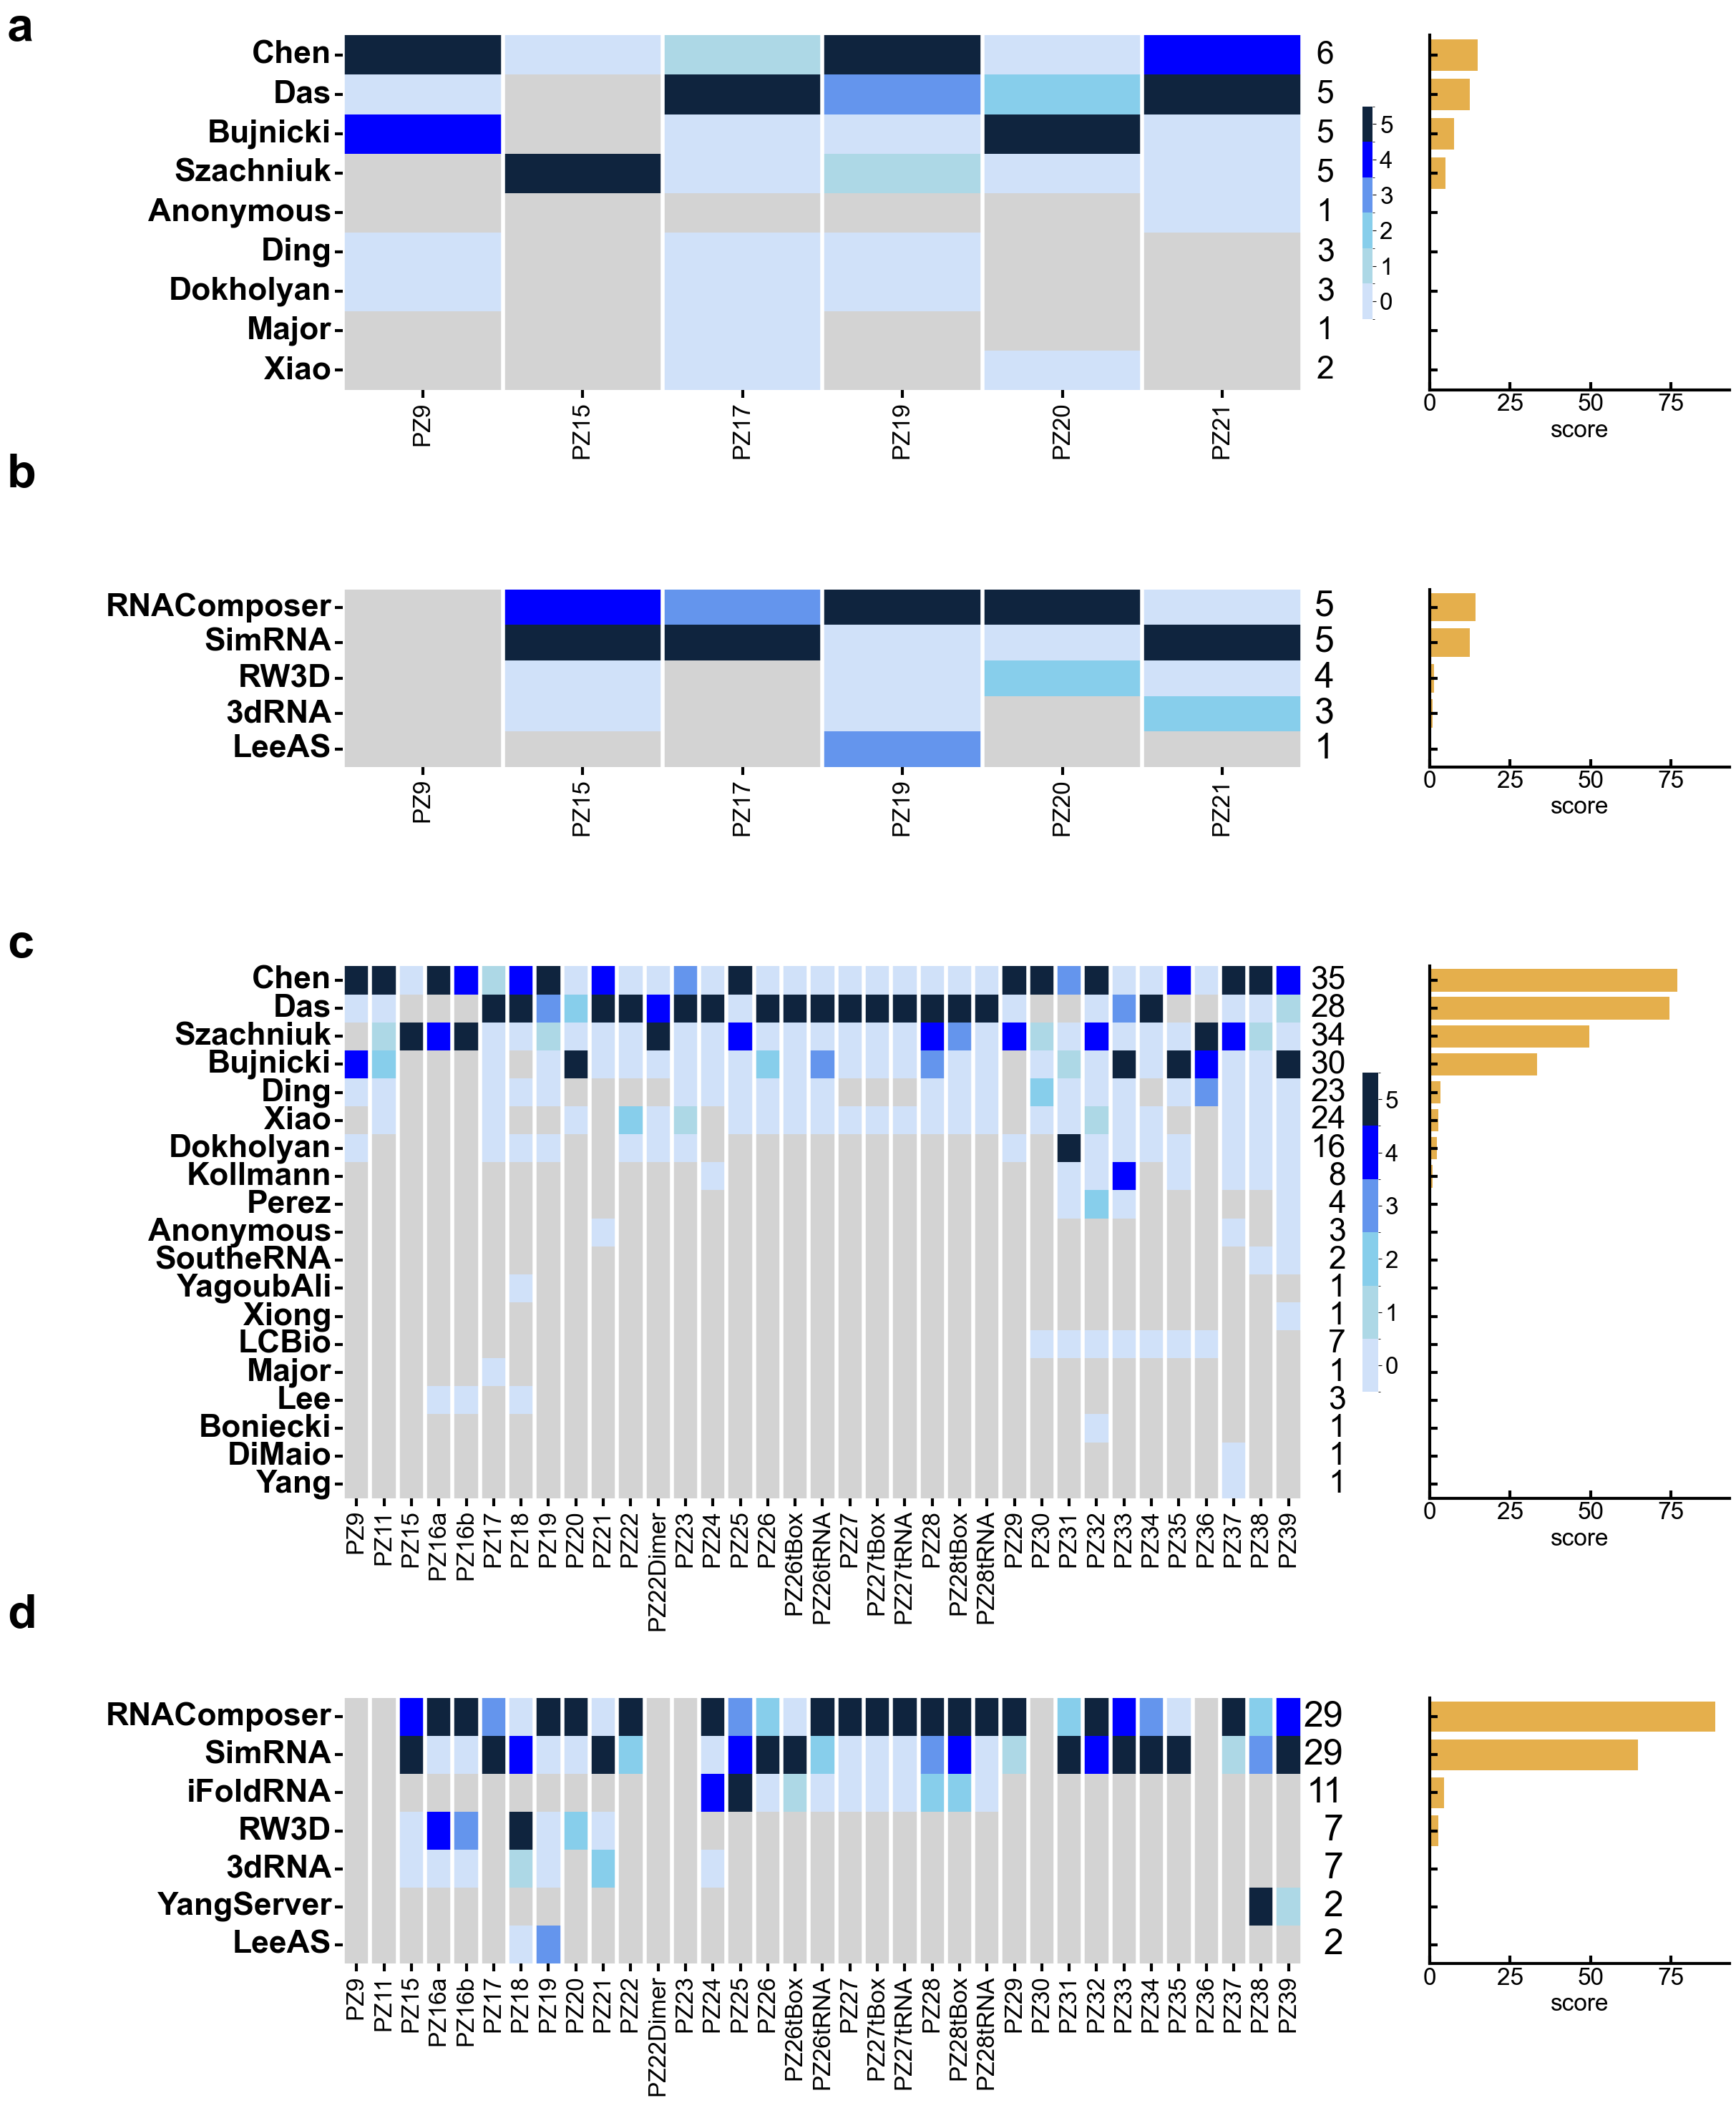

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm,LinearSegmentedColormap
import numpy as np
import matplotlib
params={
    'font.family':'Arial',
    'font.size':24}
plt.rcParams.update(params)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig, axes = plt.subplots(4, 2, figsize=(25, 35), gridspec_kw={'width_ratios': [4, 1],'height_ratios': [2, 1,3,1.5]})
fig.subplots_adjust(wspace=-0.15,hspace=0.6)
pivot_df4_humanRMSD_extratc=add_value_column_addNANonly(pivot_df4_humanRMSD_extratc,6)

pivot_df4_humanRMSD_extratc.sort_values(by='value', ascending=False, inplace=True)
pivot_df4_humanRMSD_extratc_reset = pivot_df4_humanRMSD_extratc.reset_index()
human_num=pivot_df4_humanRMSD_extratc_reset['num']
# Call the barh method on the axis object to draw a horizontal bar graph
sns.barplot(x='value', y='Groups_new', data=pivot_df4_humanRMSD_extratc_reset,color='#ffb732',ax=axes[0,1])
axes[0,1].set_yticklabels(labels=axes[0,1].get_yticklabels(),rotation = 0, size=32,fontweight='bold')
axes[0,1].set_xlabel('score')  
axes[0,1].set_ylabel('')        


#sum_all num value
# If you don't want to show the ‘Total’ column in the heatmap, you can remove it before plotting.
pivot_df4_humanRMSD_extratc.drop(columns=['sum_all','num','value'], inplace=True)


cmap = LinearSegmentedColormap.from_list(
    'custom_blue', 
    ['#d0e1f9', '#add8e6', '#87ceeb', '#6495ed', '#0000ff', '#0f243e'], 
    N=6
)


bounds = np.arange(-0.5, 6, 1)
norm = BoundaryNorm(bounds, cmap.N)



axes[0,0].set_facecolor('lightgrey')
mask = np.isnan(pivot_df4_humanRMSD_extratc)
g=sns.heatmap(pivot_df4_humanRMSD_extratc, cmap=cmap, norm=norm, ax=axes[0,0], 
            cbar_kws={'shrink': 0.6, 'ticks': np.arange(0, 6)}, mask=mask, )
g.set_ylabel('')
g.set_xlabel('')
g.set_yticklabels(labels=g.get_yticklabels(),rotation = 0, size=32,fontweight='bold')
for i in range(pivot_df4_humanRMSD_extratc.shape[1]+1):
    g.axvline(i, color='white', lw=4)


assert len(human_num) == pivot_df4_humanRMSD_extratc.shape[0], "the length of the text list must be the same as the number of lines"

# Add text to the right side of each line
for i, text in enumerate(human_num):
    x_coord = pivot_df4_humanRMSD_extratc.shape[1] + 0.2  
    y_coord = i+0.5  

    g.text(x_coord, y_coord, text, va="center", ha="right", color="black", size=32)




axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90) 
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)    
axes[0,1].spines['right'].set_visible(False)
axes[1,1].spines['right'].set_visible(False)
axes[0,1].spines['top'].set_visible(False)
axes[1,1].spines['top'].set_visible(False)




######################
pivot_df4_serverRMSD_extratc=add_value_column_addNANonly(pivot_df4_serverRMSD_extratc,6)


pivot_df4_serverRMSD_extratc.sort_values(by='value', ascending=False, inplace=True)
pivot_df4_serverRMSD_extratc_reset = pivot_df4_serverRMSD_extratc.reset_index()
server_num=pivot_df4_serverRMSD_extratc_reset['num']

sns.barplot(x='value', y='Groups_new', data=pivot_df4_serverRMSD_extratc_reset,color='#ffb732',ax=axes[1,1])
axes[1,1].set_yticklabels(labels=axes[1,1].get_yticklabels(),rotation = 0, size=30,fontweight='bold')
axes[1,1].set_xlabel('score')  
axes[1,1].set_ylabel('')       


pivot_df4_serverRMSD_extratc.drop(columns=['sum_all','num','value'], inplace=True)




axes[1,0].set_facecolor('lightgrey')

mask = np.isnan(pivot_df4_serverRMSD_extratc)
g2=sns.heatmap(pivot_df4_serverRMSD_extratc, cmap=cmap, norm=norm, ax=axes[1,0], 
            cbar_kws={'shrink': 0.6, 'ticks': np.arange(0, 6)}, mask=mask,cbar=True)






g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticklabels(labels=g2.get_yticklabels(),rotation = 0, size=32,fontweight='bold')
for i in range(pivot_df4_serverRMSD_extratc.shape[1]+1):
    g2.axvline(i, color='white', lw=4)

cbar_ax = g2.collections[0].colorbar.ax
pos = cbar_ax.get_position()

# Calculate the size and position of the rectangle used to cover the colour scale and tick marks
# Increase the width and height of the rectangle to ensure coverage of the scale values
new_width = pos.width * 8.5
new_height = pos.height * 1.1
new_x = pos.x0 - (new_width - pos.width) / 3.5
new_y = pos.y0 - (new_height - pos.height) / 2



fig.patches.extend([plt.Rectangle((new_x, new_y), new_width, new_height, fill=True, color='white', transform=fig.transFigure, figure=fig)])

assert len(server_num) == pivot_df4_serverRMSD_extratc.shape[0], "the length of the text list must be the same as the number of lines"


for i, text in enumerate(server_num):
    x_coord = pivot_df4_serverRMSD_extratc.shape[1] +0.2  # x coordinate, slightly beyond the far right of the heatmap
    y_coord = i+0.5  # y-coordinates, corresponding to each row

    g2.text(x_coord, y_coord, text, va="center", ha="right", color="black", size=36)



for ax in [axes[0,1],axes[1,1]]:
    ax.spines['left'].set_linewidth(3)   # Left axis
    ax.spines['bottom'].set_linewidth(3)  # Right axis
    ax.tick_params(axis='both',          # Applied to the x- and y-axes
               direction='in',       # Scale lines facing inwards
               length=8,            # Length of the scale
               width=3)              # Thickness of the scale

for ax in [axes[0,0],axes[1,0]]:
    ax.tick_params(axis='both',          
               direction='out',      
               length=8,            
               width=3)          

    
###########*********************************************

pivot_df4_5_humanRMSD_extratc=add_value_column_addNANonly(pivot_df4_5_humanRMSD_extratc,35)



pivot_df4_5_humanRMSD_extratc.sort_values(by='value', ascending=False, inplace=True)
pivot_df4_5_humanRMSD_extratc_reset = pivot_df4_5_humanRMSD_extratc.reset_index()
human_num=pivot_df4_5_humanRMSD_extratc_reset['num']

sns.barplot(x='value', y='Groups_new', data=pivot_df4_5_humanRMSD_extratc_reset,color='#ffb732',ax=axes[2,1])
axes[2,1].set_yticklabels(labels=axes[2,1].get_yticklabels(),rotation = 0, size=32,fontweight='bold')
axes[2,1].set_xlabel('score')  
axes[2,1].set_ylabel('')        



pivot_df4_5_humanRMSD_extratc.drop(columns=['sum_all','num','value'], inplace=True)


cmap = LinearSegmentedColormap.from_list(
    'custom_blue', 
    ['#d0e1f9', '#add8e6', '#87ceeb', '#6495ed', '#0000ff', '#0f243e'], 
    N=6
)

bounds = np.arange(-0.5, 6, 1)
norm = BoundaryNorm(bounds, cmap.N)


axes[2,0].set_facecolor('lightgrey')
mask = np.isnan(pivot_df4_5_humanRMSD_extratc)
g3=sns.heatmap(pivot_df4_5_humanRMSD_extratc, cmap=cmap, norm=norm, ax=axes[2,0], 
            cbar_kws={'shrink': 0.6, 'ticks': np.arange(0, 6)}, mask=mask, )
g3.set_ylabel('')
g3.set_xlabel('')
g3.set_yticklabels(labels=g3.get_yticklabels(),rotation = 0, size=32,fontweight='bold')
for i in range(pivot_df4_5_humanRMSD_extratc.shape[1]+1):
    g3.axvline(i, color='white', lw=4)


assert len(human_num) == pivot_df4_5_humanRMSD_extratc.shape[0], "the length of the text list must be the same as the number of lines"


for i, text in enumerate(human_num):
    x_coord = pivot_df4_5_humanRMSD_extratc.shape[1] + 1.6  
    y_coord = i+0.5  

    g3.text(x_coord, y_coord, text, va="center", ha="right", color="black", size=32)



    
axes[2,1].spines['right'].set_visible(False)
axes[3,1].spines['right'].set_visible(False)
axes[2,1].spines['top'].set_visible(False)
axes[3,1].spines['top'].set_visible(False)





######################
pivot_df4_5_serverRMSD_extratc=add_value_column_addNANonly(pivot_df4_5_serverRMSD_extratc,35)



pivot_df4_5_serverRMSD_extratc.sort_values(by='value', ascending=False, inplace=True)
pivot_df4_5_serverRMSD_extratc_reset = pivot_df4_5_serverRMSD_extratc.reset_index()
server_num=pivot_df4_5_serverRMSD_extratc_reset['num']

sns.barplot(x='value', y='Groups_new', data=pivot_df4_5_serverRMSD_extratc_reset,color='#ffb732',ax=axes[3,1])
axes[3,1].set_yticklabels(labels=axes[3,1].get_yticklabels(),rotation = 0, size=30,fontweight='bold')
axes[3,1].set_xlabel('score')  
axes[3,1].set_ylabel('')        

pivot_df4_5_serverRMSD_extratc.drop(columns=['sum_all','num','value'], inplace=True)




axes[3,0].set_facecolor('lightgrey')

mask = np.isnan(pivot_df4_5_serverRMSD_extratc)
g4=sns.heatmap(pivot_df4_5_serverRMSD_extratc, cmap=cmap, norm=norm, ax=axes[3,0], 
            cbar_kws={'shrink': 0.6, 'ticks': np.arange(0, 6)}, mask=mask,cbar=True)






g4.set_ylabel('')
g4.set_xlabel('')
g4.set_yticklabels(labels=g4.get_yticklabels(),rotation = 0, size=32,fontweight='bold')
for i in range(pivot_df4_5_serverRMSD_extratc.shape[1]+1):
    g4.axvline(i, color='white', lw=4)


cbar_ax = g4.collections[0].colorbar.ax
pos = cbar_ax.get_position()


new_width = pos.width * 8
new_height = pos.height * 1.1
new_x = pos.x0 - (new_width - pos.width) / 3.5
new_y = pos.y0 - (new_height - pos.height) / 2



fig.patches.extend([plt.Rectangle((new_x, new_y), new_width, new_height, fill=True, color='white', transform=fig.transFigure, figure=fig)])

assert len(server_num) == pivot_df4_5_serverRMSD_extratc.shape[0], "the length of the text list must be the same as the number of lines"


for i, text in enumerate(server_num):
    x_coord = pivot_df4_5_serverRMSD_extratc.shape[1] +1.5  
    y_coord = i+0.5  

    g4.text(x_coord, y_coord, text, va="center", ha="right", color="black", size=36)





for ax in [axes[2,1],axes[3,1]]:
    ax.spines['left'].set_linewidth(3)   
    ax.spines['bottom'].set_linewidth(3)  
    ax.tick_params(axis='both',          
               direction='in',       
               length=8,            
               width=3)              

for ax in [axes[2,0],axes[3,0]]:
    ax.tick_params(axis='both',          
               direction='out',       
               length=8,           
               width=3)          



axes[0,0].text(-0.35, 1.08, "a", transform=axes[0,0].transAxes,va='top', ha='left',fontweight='bold',fontsize=48)
axes[1,0].text(-0.35, -0.18, "b", transform=axes[0,0].transAxes,va='top', ha='left',fontweight='bold',fontsize=48)
axes[0,0].text(-0.35, 1.08, "c", transform=axes[2,0].transAxes,va='top', ha='left',fontweight='bold',fontsize=48)
axes[3,0].text(-0.35, -0.18, "d", transform=axes[2,0].transAxes,va='top', ha='left',fontweight='bold',fontsize=48)

######################************************************

max_xlim = max(axes[0,1].get_xlim()[1], axes[1,1].get_xlim()[1],axes[2,1].get_xlim()[1],axes[3,1].get_xlim()[1])


axes[0,1].set_xlim(0, max_xlim)
axes[1,1].set_xlim(0, max_xlim)
axes[2,1].set_xlim(0, max_xlim)
axes[3,1].set_xlim(0, max_xlim)



axes[0, 1].set_yticklabels([])
axes[1, 1].set_yticklabels([])
axes[2, 1].set_yticklabels([])
axes[3, 1].set_yticklabels([])
##########

plt.savefig("./figures/Extended_Data_Figure9/ED9.pdf", bbox_inches='tight',format='pdf')
plt.show()